## Cleaning Data

#### Basic cleaning of data

In [1]:
# Import the raw data from google drive and get a peak at what the data looks like.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/Modern Analytics/Cases/Final Project/high_diamond_ranked_10min.csv'
df = pd.read_csv(file_path)
df.head()

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [ ]:
# Checking out what each column is
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

None

Here I can see that I have the data set from Kaggle that includes 40 columns and 9879 rows. Each row represents in game stats for a ranked league of legends game for both blue and red team. There are no missing values in this data set. The target column is "bluewins".

#### Sweetviz report

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

report = sv.analyze(df, target_feat='blueWins')
report.show_html()  # Generates an HTML file and opens it in a new tab

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Here I used the package sweetviz to get a deep understanding of our data through the cool analysis it does. However, the downside of this package is I cannot display the results from it here in the notebook. I am going to upload the sweetviz report as an appendix.

### Normalize numeric columns
Here I normalize any numeric columns that are not classication ones or id for the game.

Since I am an expert on League of Legends (over 3000 hours game play time). I am confident to say that data in all columns are in the correct format. I just need to normalize numeric columns to make it more accurate for our MLP model to predict.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify columns that needs normalize
columns_not_to_normalize = ['gameId', 'blueWins', 'blueFirstBlood', 'redFirstBlood', 'blueDragons', 'redDragons', 'blueHeralds', 'redHeralds']
columns_to_normalize = [col for col in df.columns if col not in columns_not_to_normalize]

# Normalize the data
scaler = StandardScaler()
df_to_normalize = df[columns_to_normalize]
df_scaled = scaler.fit_transform(df_to_normalize)

# Turn the scaled array back into a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_normalize)

# Create a new dataframe by copying the original one
df_normalized = df.copy()

# Update the new dataframe with the scaled data
df_normalized.update(df_scaled)

In [ ]:
# Checking the new normalized data frame
df_normalized.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,-0.879231,0,...,-0.198353,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,4523371949,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,-0.879231,0,...,4.412301,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,4521474530,0,-0.404494,-1.298863,0,0.271042,1.657424,-0.650812,0.719503,1,...,-0.198353,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,4524384067,0,1.149484,-0.839069,0,-0.725346,-0.387796,-0.404768,0.719503,0,...,-0.198353,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,4436033771,0,2.925460,0.540312,0,-0.061087,-0.046926,-0.158724,-0.879231,0,...,-0.198353,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731


This dataframe (df_normalized) will be the one I am going to use for our MLP model.

## Exploratory Data Analysis (EDA)
At this point, data is clean to be explored. We are going to do some exploratory Data Analysis here.

### Comparing features from blue and red side

#### Win/Losses
To win in league of legends you have to destroy the opposing nexus and that by gradually destroying the opposing turrets and the opposing inibitors.

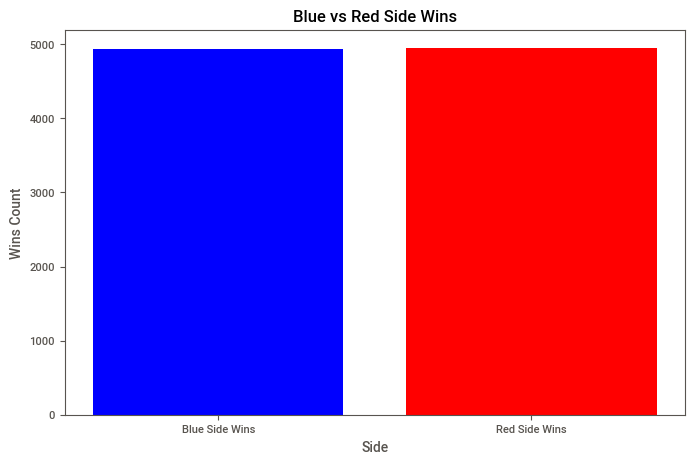

In [ ]:
import matplotlib.pyplot as plt

# Count the number of wins for each side
blue_wins = df['blueWins'].sum()
red_wins = len(df) - blue_wins

# Data to plot
labels = 'Blue Side Wins', 'Red Side Wins'
sizes = [blue_wins, red_wins]
colors = ['blue', 'red']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Blue vs Red Side Wins')
plt.xlabel('Side')
plt.ylabel('Wins Count')
plt.show()

As I can see from the histogram, from the data, both side had equally winning chance. (About 50%)

#### Wards
A ward is a deployable unit that removes the fog of war in a certain area of the map. Vision is not just buying and placing wards. It is not always a unit and it can be granted through champions as well as items that they purchase.

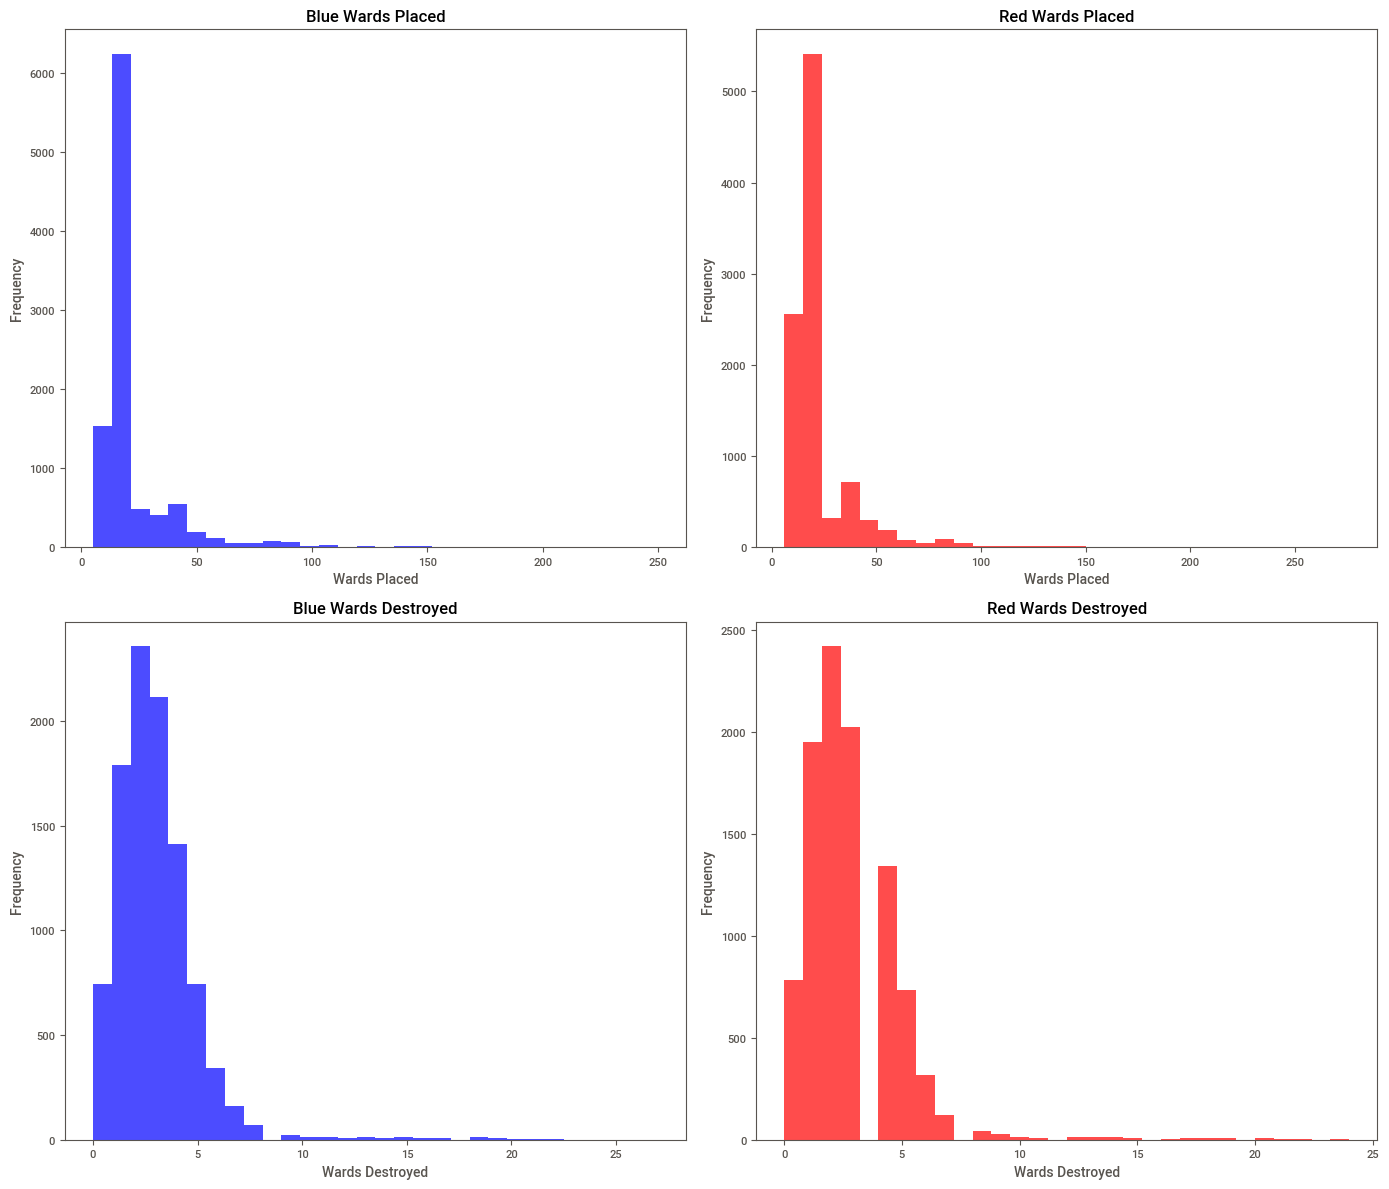

In [ ]:
# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Plot 1: Blue wards placed
axes[0, 0].hist(df['blueWardsPlaced'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Blue Wards Placed')
axes[0, 0].set_xlabel('Wards Placed')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Red wards placed
axes[0, 1].hist(df['redWardsPlaced'], bins=30, color='red', alpha=0.7)
axes[0, 1].set_title('Red Wards Placed')
axes[0, 1].set_xlabel('Wards Placed')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Blue wards destroyed
axes[1, 0].hist(df['blueWardsDestroyed'], bins=30, color='blue', alpha=0.7)
axes[1, 0].set_title('Blue Wards Destroyed')
axes[1, 0].set_xlabel('Wards Destroyed')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Red wards destroyed
axes[1, 1].hist(df['redWardsDestroyed'], bins=30, color='red', alpha=0.7)
axes[1, 1].set_title('Red Wards Destroyed')
axes[1, 1].set_xlabel('Wards Destroyed')
axes[1, 1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

Wards place or destory are pretty similar amongst both sides.

#### First Bloods
It determines which team scored the first champion kill of the game.

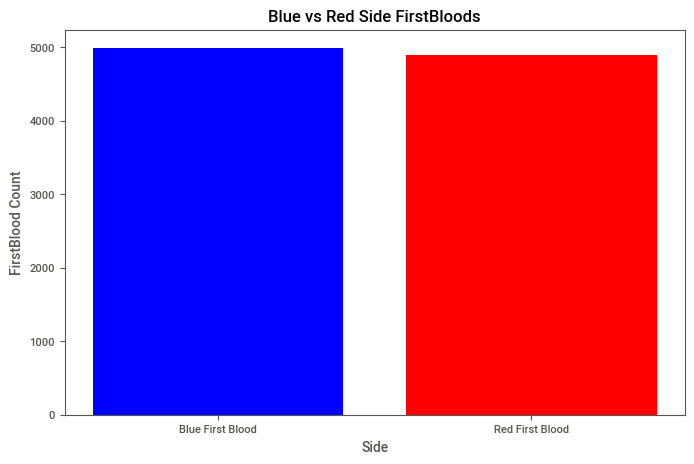

In [ ]:
# Data to plot
labels = 'Blue First Blood', 'Red First Blood'
sizes = [df['blueFirstBlood'].sum(), df['redFirstBlood'].sum()]
colors = ['blue', 'red']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Blue vs Red Side FirstBloods')
plt.xlabel('Side')
plt.ylabel('FirstBlood Count')
plt.show()

Still, for first bloods, it seemed pretty evenly distributed between both sides.

#### Kills Deaths Assists (KDA)
It is pretty common metric in this game to calculate a team's performance by calculating its KDA using the formula: (Kills+Assists)/Deaths.

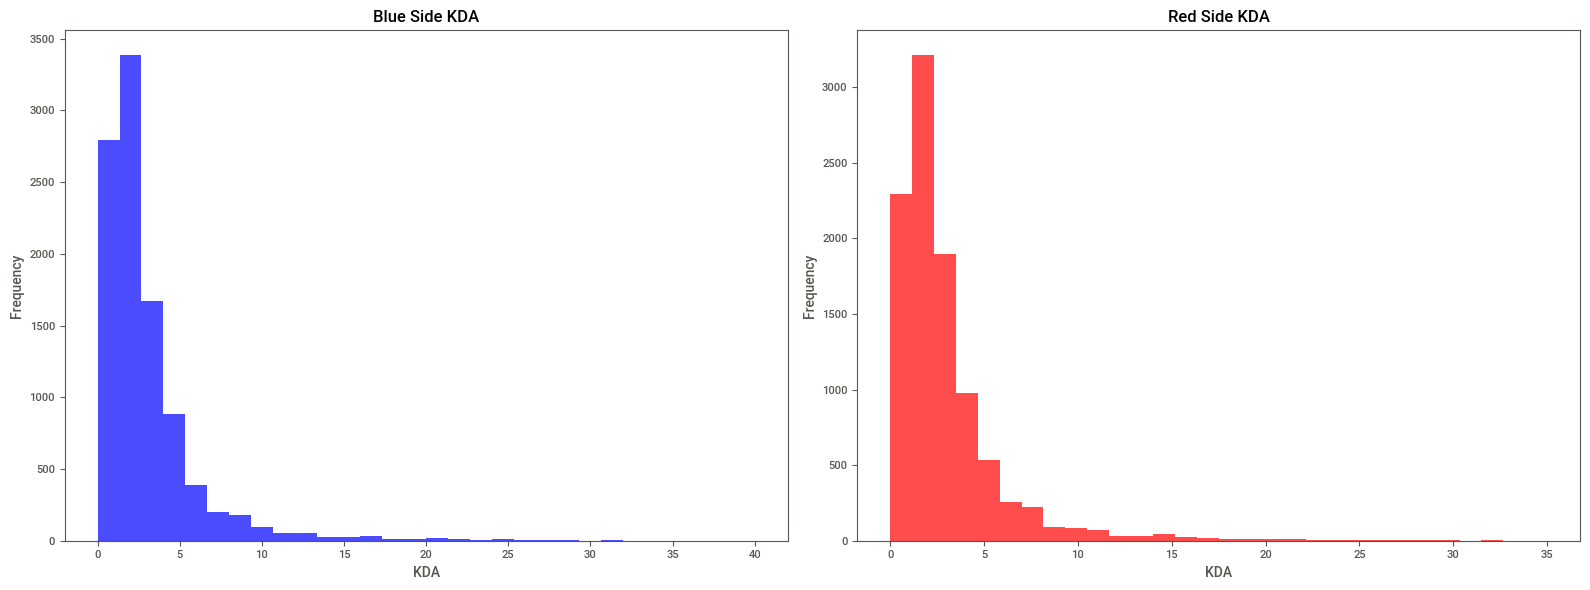

In [ ]:
# Calculate KDA for both teams within the plotting code
blueKDA = (df['blueKills'] + df['blueAssists']) / df['blueDeaths'].replace(0, 1)  # Avoid division by zero
redKDA = (df['redKills'] + df['redAssists']) / df['redDeaths'].replace(0, 1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for blue team KDA
axes[0].hist(blueKDA, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Blue Side KDA')
axes[0].set_xlabel('KDA')
axes[0].set_ylabel('Frequency')

# Plot for red team KDA
axes[1].hist(redKDA, bins=30, color='red', alpha=0.7)
axes[1].set_title('Red Side KDA')
axes[1].set_xlabel('KDA')
axes[1].set_ylabel('Frequency')

# Adjust the layout and show plot
plt.tight_layout()
plt.show()


KDA from both sides looks pretty similar as well.

#### Neutral Objectives
In the game of League of Legends, there are tons of neutral objectives to fight for. There is one role which is called "jungle" that levels up and gaining gold just by farming elite monsters.

Both sides have monsters, buffs, and there is 3 major neutral objectives called Dragon, Herald, and Baron for both team to fight for to gain advantage against each other.


From the jungle map we see above. Dragons, Heralds and Barons are called Elite monsters. Heralds are at the place of the Baron before 20 minutes. Because the in game data only lasts to the 10 minutes mark, no team could possibly kill a dragon at that time since it is not there yet.

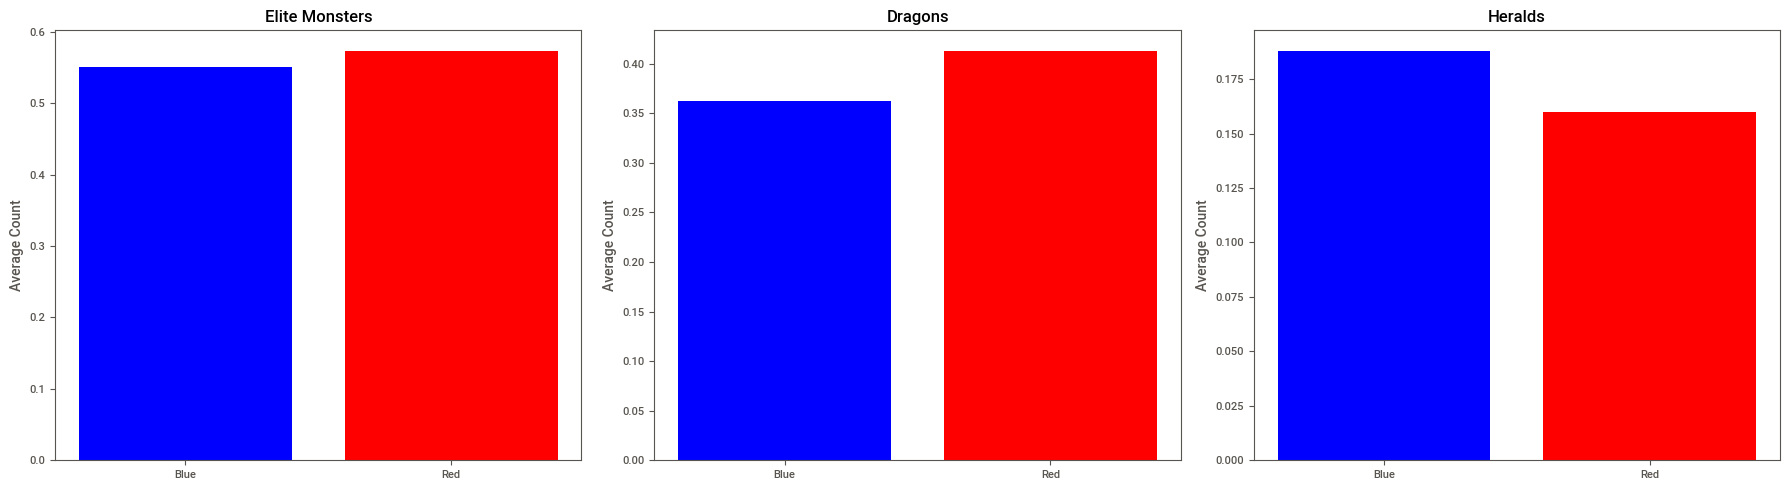

In [ ]:
# Prepare data to make visualization
elite_monsters = [df['blueEliteMonsters'].mean(), df['redEliteMonsters'].mean()]
dragons = [df['blueDragons'].mean(), df['redDragons'].mean()]
heralds = [df['blueHeralds'].mean(), df['redHeralds'].mean()]

labels = ['Blue', 'Red']

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Elite Monsters
axes[0].bar(labels, elite_monsters, color=['blue', 'red'])
axes[0].set_title('Elite Monsters')
axes[0].set_ylabel('Average Count')

# Dragons
axes[1].bar(labels, dragons, color=['blue', 'red'])
axes[1].set_title('Dragons')
axes[1].set_ylabel('Average Count')

# Heralds
axes[2].bar(labels, heralds, color=['blue', 'red'])
axes[2].set_title('Heralds')
axes[2].set_ylabel('Average Count')

# Display the plot
plt.tight_layout()
plt.show()

It is very interesting to find that red side has an advantage over blue side on neutral objective controls. This is pretty intuitive to think about based on my domain knowledge as well because based on how the map is designed, it is easier for red side to control Dragon over blue side. However, blue has a slight advantage over red to control Heralds.

#### Turrents
Turrets, also called towers, are heavy fortifications that attack enemy units on sight. Turrets are a core component of League of Legends. They deal damage to enemies and provide vision to their team, allowing them to better control the battlefield. Turrets target one unit at a time and deal heavy damage. Teams must destroy enemy turrets to push their assault into enemy territory.

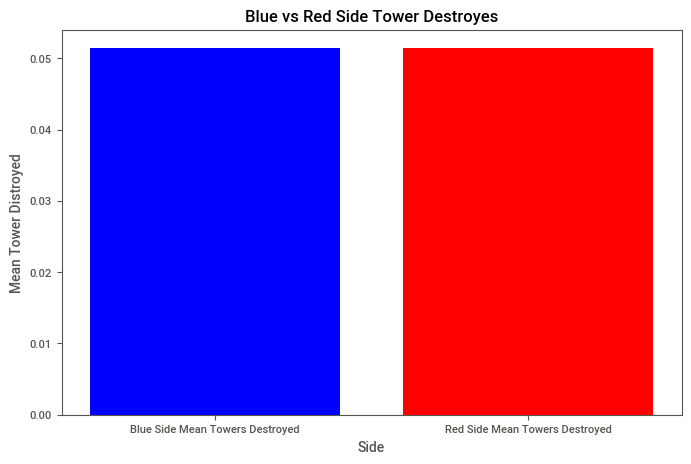

In [ ]:
# Data to plot
labels = 'Blue Side Mean Towers Destroyed', 'Red Side Mean Towers Destroyed'
sizes = [df['blueTowersDestroyed'].mean(), df['blueTowersDestroyed'].mean()]
colors = ['blue', 'red']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Blue vs Red Side Tower Destroyes')
plt.xlabel('Side')
plt.ylabel('Mean Tower Distroyed')
plt.show()

As I can see, although the mean is very low, it is still pretty balanced between both side. It is uncommon to have any turrents destroyed at the 10 minutes mark.

#### Gold
Gold is the in-game currency of League of Legends. It is used to buy items in the shop that provide champions with bonus stats and abilities, which in turn is one of the main ways for champions to increase their power over the course of a game.

At the beginning of the game, champions are given starting gold based on the map being played on, and can receive more gold through various means.


In this data set, there are 3 columns for both sides that are related to gold, which are total gold, gold per minute, and gold difference. We are going to compare all of them here together.

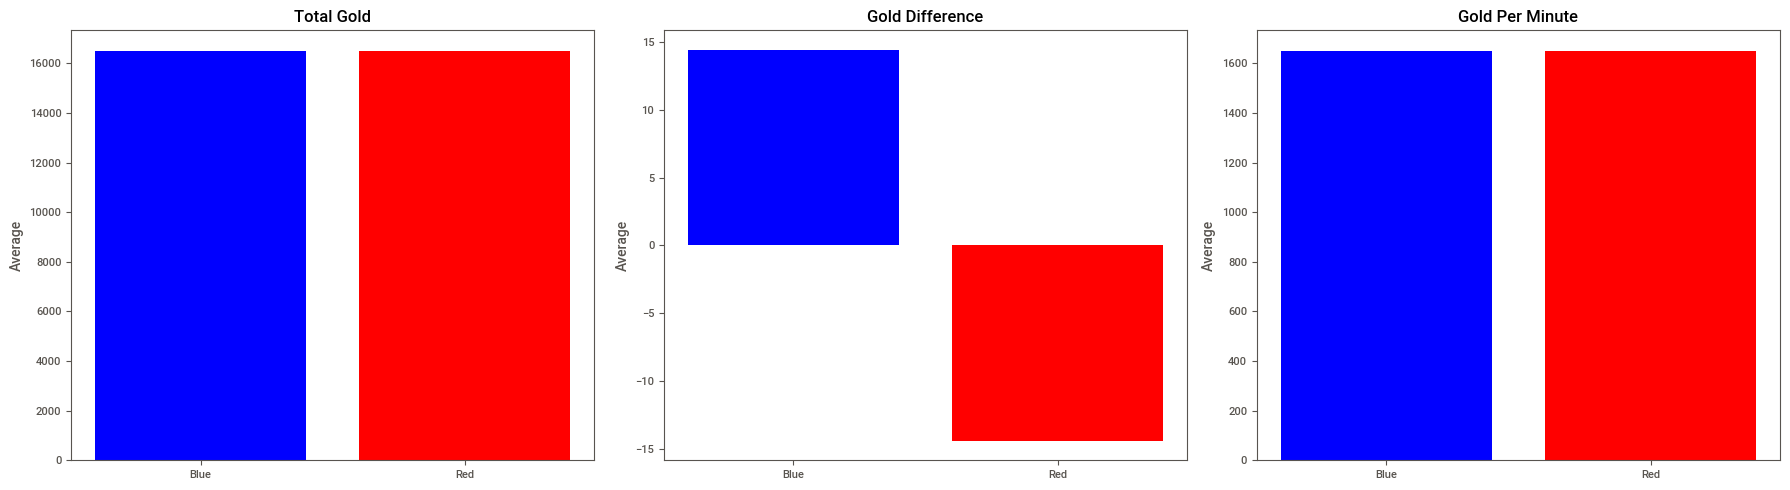

In [ ]:
# Prepare data to make visualization
TotalGold = [df['blueTotalGold'].mean(), df['redTotalGold'].mean()]
GoldDiff = [df['blueGoldDiff'].mean(), df['redGoldDiff'].mean()]
GoldPerMin = [df['blueGoldPerMin'].mean(), df['redGoldPerMin'].mean()]

labels = ['Blue', 'Red']

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Total Gold
axes[0].bar(labels, TotalGold, color=['blue', 'red'])
axes[0].set_title('Total Gold')
axes[0].set_ylabel('Average')

# Gold Difference
axes[1].bar(labels, GoldDiff, color=['blue', 'red'])
axes[1].set_title('Gold Difference')
axes[1].set_ylabel('Average')

# Gold Per Minute
axes[2].bar(labels, GoldPerMin, color=['blue', 'red'])
axes[2].set_title('Gold Per Minute')
axes[2].set_ylabel('Average')

# Display the plot
plt.tight_layout()
plt.show()

As I can see from the plots, again, they are pretty similar between both sides. Gold difference is backwards however at the same absolute value, which is very easy to understand.

#### Experience (Leveling Up)
Champion experience (XP) is a game mechanic that allows champions to level up after reaching certain amounts of experience. Leveling up allows them access to new abilities or higher ranks of existing abilities. Many base stats and some items and runes scale with champion's level.

Experience isn't gained over time, it has to be earned through different ways. For example, killing minions, or neutral monsters.


In this data set, there are 3 columns for both sides that are related to leveling up, which are average level, total experience gained, and total experience difference. We are going to compare all of them here together.

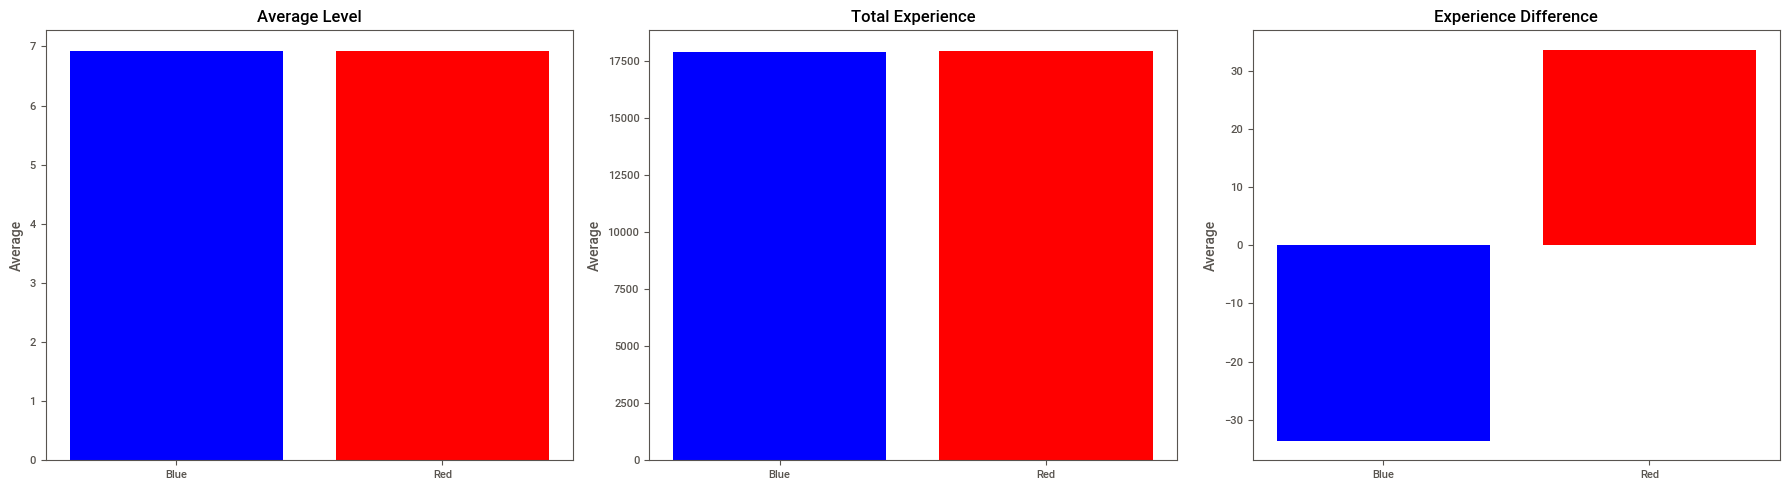

In [ ]:
# Prepare data to make visualization
AvgLevel = [df['blueAvgLevel'].mean(), df['redAvgLevel'].mean()]
TotalExperience = [df['blueTotalExperience'].mean(), df['redTotalExperience'].mean()]
ExperienceDiff = [df['blueExperienceDiff'].mean(), df['redExperienceDiff'].mean()]

labels = ['Blue', 'Red']

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Average Level
axes[0].bar(labels, AvgLevel, color=['blue', 'red'])
axes[0].set_title('Average Level')
axes[0].set_ylabel('Average')

# Total Experience
axes[1].bar(labels, TotalExperience, color=['blue', 'red'])
axes[1].set_title('Total Experience')
axes[1].set_ylabel('Average')

# Experience Difference
axes[2].bar(labels, ExperienceDiff, color=['blue', 'red'])
axes[2].set_title('Experience Difference')
axes[2].set_ylabel('Average')

# Display the plot
plt.tight_layout()
plt.show()

Again, both sides are very similar with no significant difference.

#### Minion Kills
Minions are units that comprise the main force sent by the Nexus. They spawn periodically from their nexus and advance along a lane towards the enemy nexus, automatically engaging any enemy unit or structure they encounter. They are controlled by artificial intelligence, and only use basic attacks.

There are four types of minions: Blue Melee, Blue Caster, Blue Siege and Blue Super.

Players gain experience to level up and gold to purchase items by killing minions. We are going to compare jungle minions here as well since jungle minions are the gold and experience source for the "jungle" role, which is why we treat it as the same category as minions here.

<img src="https://raw.githubusercontent.com/DericMei/Final-Project/main/Minions.webp" width="500" height="300"/>

In this data set, there are 3 columns for both sides that are related to minions, which are Total Jungle Minions Killed, Total Minions Killed, and CSPerMin which is how many minions killed per minute. We are going to compare all of them here together.

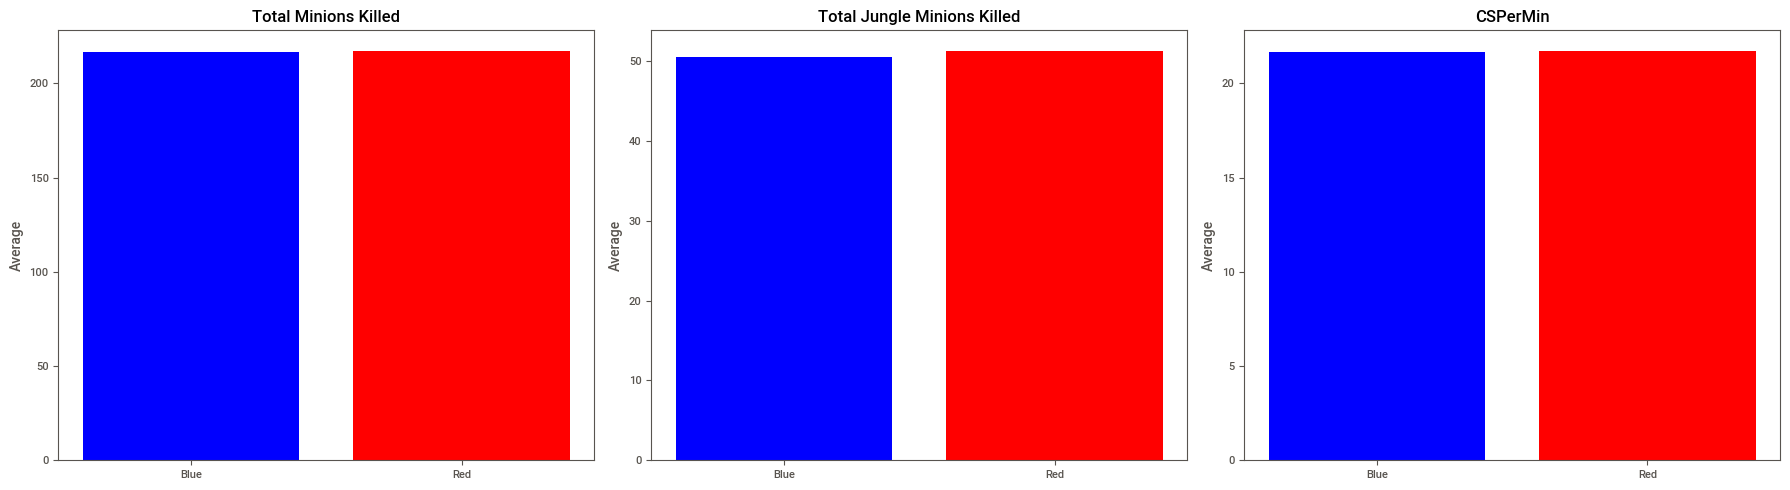

In [ ]:
# Prepare data to make visualization
TotalMinionsKilled = [df['blueTotalMinionsKilled'].mean(), df['redTotalMinionsKilled'].mean()]
TotalJungleMinionsKilled = [df['blueTotalJungleMinionsKilled'].mean(), df['redTotalJungleMinionsKilled'].mean()]
CSPerMin = [df['blueCSPerMin'].mean(), df['redCSPerMin'].mean()]

labels = ['Blue', 'Red']

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# TotalMinionsKilled
axes[0].bar(labels, TotalMinionsKilled, color=['blue', 'red'])
axes[0].set_title('Total Minions Killed')
axes[0].set_ylabel('Average')

# TotalJungleMinionsKilled
axes[1].bar(labels, TotalJungleMinionsKilled, color=['blue', 'red'])
axes[1].set_title('Total Jungle Minions Killed')
axes[1].set_ylabel('Average')

# CSPerMin
axes[2].bar(labels, CSPerMin, color=['blue', 'red'])
axes[2].set_title('CSPerMin')
axes[2].set_ylabel('Average')

# Display the plot
plt.tight_layout()
plt.show()

Again, they are pretty similar here. However, if you take a closer look, red actually has a slightly higher minion kills, which again proved our previous point of red team may be more towards neutral objectives due to slight advantages on map design.

### Unsupervised Learning
I am going to try PCA and K-means here to understand more of the data.

#### Factor Analysis
Here I mainly used PCA to reduce feature dimensions to get a better understanding of the data

In [ ]:
%pip install factor_analyzer

In [ ]:
# Step 1: Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df.iloc[:, 2:40])
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df.iloc[:, 2:40])
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.6762690281161573


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


So the result here is a go ahead.

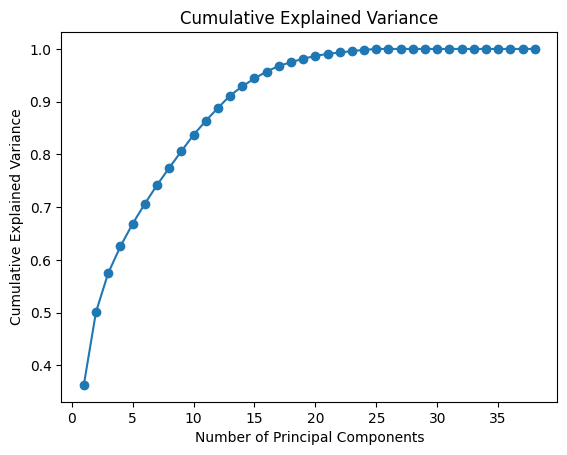

array([1.20758736e+01, 4.60942417e+00, 2.43706742e+00, 1.68607606e+00,
       1.42270347e+00, 1.26167114e+00, 1.17955686e+00, 1.08320071e+00,
       1.05660088e+00, 1.02548990e+00, 8.83853515e-01, 8.15393018e-01,
       7.85695384e-01, 5.80074835e-01, 4.96758936e-01, 4.39947351e-01,
       3.51166124e-01, 2.35813259e-01, 2.18407916e-01, 1.80945300e-01,
       1.22499475e-01, 9.00373316e-02, 8.60733840e-02, 8.05608672e-02,
       5.88934278e-02, 2.38154615e-30, 2.15518526e-31, 1.51161169e-31,
       1.41953248e-31, 6.78876362e-32, 6.05262676e-32, 5.75353701e-32,
       5.75353701e-32, 5.75353701e-32, 5.75353701e-32, 5.75353701e-32,
       2.18992671e-32, 6.07408505e-33])

In [ ]:
# Step 2: Determine the number of factors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the data frame for PCA
df_pca = df_normalized.iloc[:, 2:40]

# Create and fit the PCA model
pca = PCA()
pca.fit(df_pca)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

10 components can explain the data set very well at this point. They all have explained variance higher than 1. And with 10 components it can explain more than 80% of the variance in our data. However, I am going with 6 to caputure 70% of the variance, since 10 factors are simply too much to interpret.

In [ ]:
# Step 3: Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

fa = FactorAnalysis(n_components=6)
fa.fit(df_pca)
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5',
                                       'Factor 6'], index=df_normalized.columns[2:40])

Rotated Factor Loadings:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
blueWardsPlaced,-0.008710,0.005540,0.028601,-0.010187,0.016706,-0.020420
blueWardsDestroyed,-0.033085,-0.054261,0.015568,0.005709,0.062836,-0.028158
blueFirstBlood,-0.147757,-0.127915,-0.079839,-0.031398,0.022778,-0.056556
blueKills,-0.946086,0.006373,0.208722,-0.215531,-0.039391,-0.115373
blueDeaths,0.006028,0.949410,-0.084192,-0.100222,-0.269197,0.094788
blueAssists,-0.811705,-0.019766,0.061653,-0.092238,-0.013260,-0.109039
blueEliteMonsters,-0.123983,-0.118572,0.034309,-0.017193,0.160070,-0.497824
blueDragons,-0.050226,-0.057860,0.022630,0.001331,0.028423,-0.272518
blueHeralds,-0.027325,-0.016306,-0.001169,-0.012086,0.071700,-0.038869
blueTowersDestroyed,-0.233835,0.006356,-0.192362,-0.053616,0.357440,-0.014900


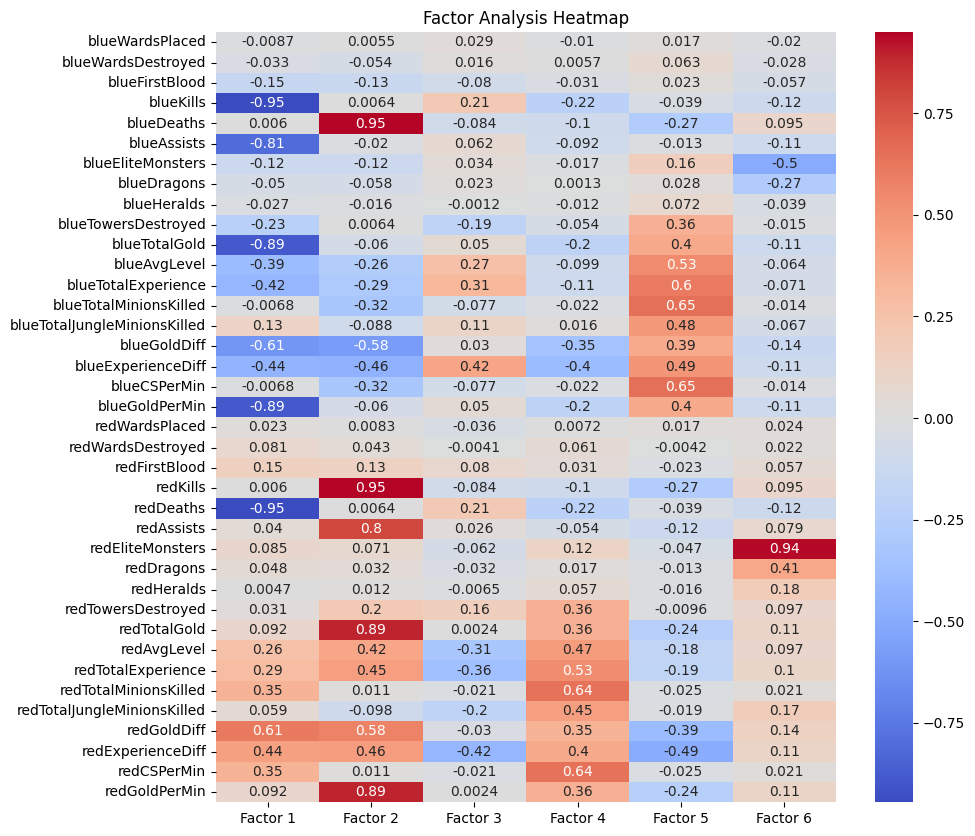

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the factor loadings
rotated_loading_df = pd.DataFrame(rotated_loading,
                                  columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5',
                                           'Factor 6'],
                                  index=df.columns[2:40])

plt.figure(figsize=(10, 10))
sns.heatmap(rotated_loading_df, cmap='coolwarm', annot=True)
plt.title('Factor Analysis Heatmap')
plt.show()

* Factor 1: Kills For blue
> Low score means blue getting kills.

* Factor 2: Kills for red
> High score means red is getting kills.

* Factor 3: Experience and Level (For Blue)
> High Score means blue is doing well, low means red is doing well.

* Factor 4: Resource Management and Farming (For Red)
> High Score means red is doing well, low means blue is doing well.

* Factor 5: Resource Management and Farming (For Blue)
> High Score means blue is doing well, low means red is doing well.

* Factor 6: Neutral Objective Control (For Red)
> High Score means red is doing well, low means blue is doing well.

In [ ]:
# Step 4: Create and name the factor scores

# Create a copy of the data framre to store these
df_unsupervised = df.copy()

# Extract the factor scores
factor_scores = fa.transform(df_pca)

# Name the factor scores
df_unsupervised['kills_blue'] = factor_scores[:, 0]
df_unsupervised['kills_red'] = factor_scores[:, 1]
df_unsupervised['experience_level_blue'] = factor_scores[:, 2]
df_unsupervised['farming_red'] = factor_scores[:, 3]
df_unsupervised['farming_blue'] = factor_scores[:, 4]
df_unsupervised['neutral_objective_red'] = factor_scores[:, 5]

In [ ]:
df_unsupervised.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,kills_blue,kills_red,experience_level_blue,farming_red,farming_blue,neutral_objective_red
0,4519157822,0,28,2,1,9,6,11,0,0,...,-643,8,19.7,1656.7,-0.311540,0.565369,-1.051836,0.095810,-0.767071,-0.618327
1,4523371949,0,12,1,0,5,5,5,0,0,...,2908,1173,24.0,1762.0,0.815820,-0.481044,-0.542681,1.956789,-2.273347,1.975155
2,4521474530,0,15,0,0,7,11,4,1,1,...,1172,1033,20.3,1728.5,0.623458,0.947011,0.572110,-2.444754,-0.274717,-1.053161
3,4524384067,0,43,1,0,4,5,5,1,0,...,1321,7,23.5,1647.8,0.361890,-0.795267,0.617468,0.664634,-0.981849,-0.997440
4,4436033771,0,75,4,0,6,6,6,0,0,...,1004,-230,22.5,1740.4,0.207778,0.146243,0.477212,1.688621,-0.586868,0.733839


#### Cluster Analysis
I am going to use Cluster Analysis to further reduce the dimensions of games, and segment them into

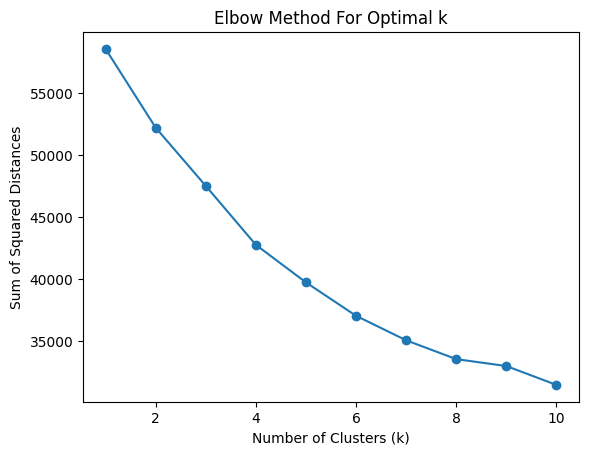

In [ ]:
# Step 1: determine the number of clusters
# I am going to use The Elbow here!
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_unsupervised.iloc[:, 40:])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

I am going with 4 clusters here.

In [ ]:
# Step 2:  Calculate the final cluster solution for the new 6 FA components

# Re-fit k-means using 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=11, n_init='auto')

# Add a new column with cluster assignment for each match

df_unsupervised['Cluster_FA'] = kmeans_8.fit_predict(df_unsupervised.iloc[:, 40:])

In [ ]:
# Step 3: Interpret the K-means output
cluster_centers_fa = pd.DataFrame(kmeans_8.cluster_centers_,
                                  columns=['kills_blue', 'kills_red', 'experience_level_blue', 'farming_red', 'farming_blue', 'neutral_objective_red'],
                                  index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',
                                         'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'])

print("Cluster Centers:")
cluster_centers_fa

Cluster Centers:


,kills_blue,kills_red,experience_level_blue,farming_red,farming_blue,neutral_objective_red
Cluster 1,0.995448,0.905612,0.632767,-0.895991,0.219127,-0.169193
Cluster 2,0.357739,-0.463402,-0.804219,-0.459671,0.081587,0.917501
Cluster 3,0.147557,-0.497933,-0.852300,-0.231139,0.024219,-0.972286
Cluster 4,0.900801,0.469308,-0.120290,1.512640,-0.268970,0.168022
Cluster 5,-0.874862,0.506029,-0.116667,0.293364,1.507875,-0.104515
Cluster 6,-0.387909,-0.603038,0.794893,0.056162,-0.235118,-0.835546
Cluster 7,-0.044418,-0.603260,0.746311,0.183634,-0.104997,0.992185
Cluster 8,-1.022106,0.866244,-0.353937,-0.127639,-1.071769,-0.057579


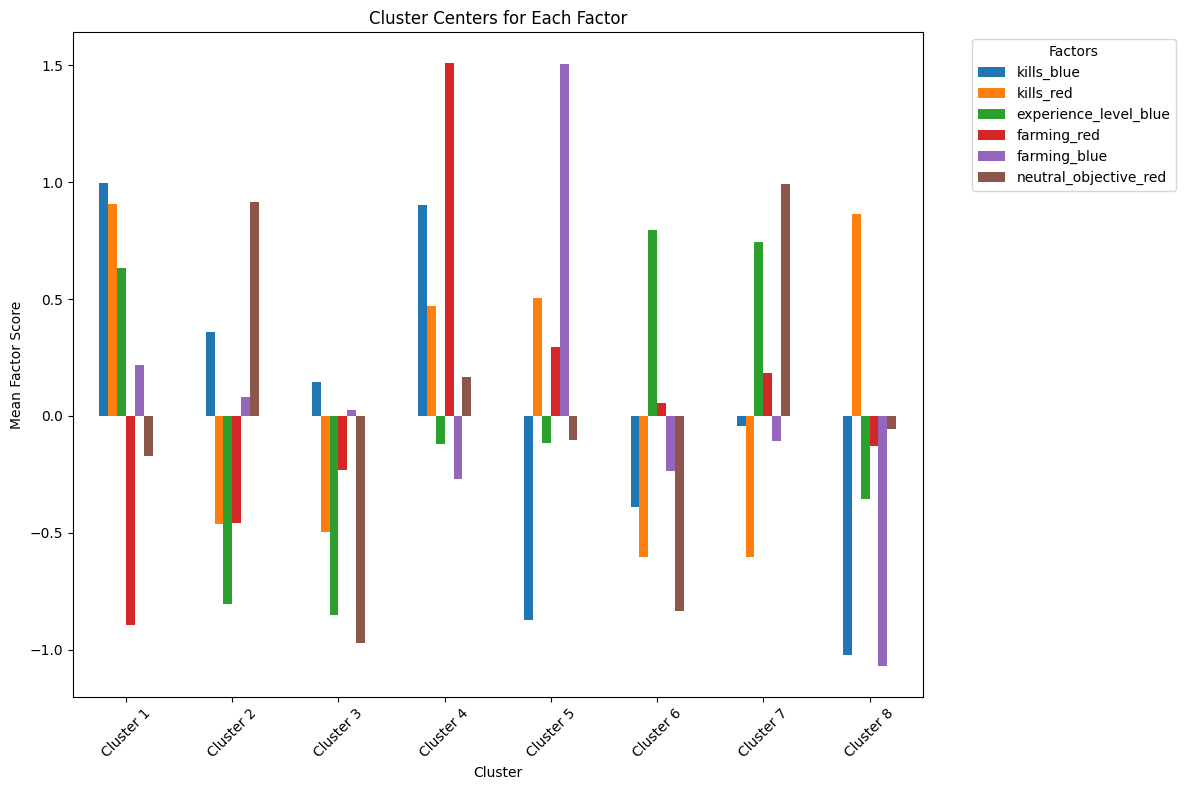

In [ ]:
# Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the cluster centers
cluster_centers_fa.plot(kind='bar', figsize=(12, 8))

# Adding labels and title
plt.title('Cluster Centers for Each Factor')
plt.ylabel('Mean Factor Score')
plt.xlabel('Cluster')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Add labels to the clusters
df_unsupervised['Segment_Label_FA'] = df_unsupervised['Cluster_FA'].replace({0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8'})
df_unsupervised

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redCSPerMin,redGoldPerMin,kills_blue,kills_red,experience_level_blue,farming_red,farming_blue,neutral_objective_red,Cluster_FA,Segment_Label_FA
0,4519157822,0,28,2,1,9,6,11,0,0,...,19.7,1656.7,-0.311540,0.565369,-1.051836,0.095810,-0.767071,-0.618327,7,8
1,4523371949,0,12,1,0,5,5,5,0,0,...,24.0,1762.0,0.815820,-0.481044,-0.542681,1.956789,-2.273347,1.975155,3,4
2,4521474530,0,15,0,0,7,11,4,1,1,...,20.3,1728.5,0.623458,0.947011,0.572110,-2.444754,-0.274717,-1.053161,0,1
3,4524384067,0,43,1,0,4,5,5,1,0,...,23.5,1647.8,0.361890,-0.795267,0.617468,0.664634,-0.981849,-0.997440,5,6
4,4436033771,0,75,4,0,6,6,6,0,0,...,22.5,1740.4,0.207778,0.146243,0.477212,1.688621,-0.586868,0.733839,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,22.9,1524.6,-1.047344,-0.210847,1.014721,0.411033,0.472819,-0.790211,5,6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,20.6,1545.6,-0.400300,-0.652889,0.114028,-0.019840,-0.695942,-0.803249,5,6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,26.1,1831.9,0.845680,0.400583,-0.995201,1.720720,-0.563702,0.541279,3,4
9877,4527628313,0,14,4,1,2,3,3,1,1,...,24.7,1529.8,0.376420,-1.822586,-0.552690,-0.258496,-0.075649,-1.160202,2,3


#### Interpreting FA&CA Results


In [ ]:
# Interpreting Segment 1

# Calculate the number of games where 'Segment_Label_FA' is 'Blue_well' and 'blueWins' is 1
seg1_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '1') & (df_unsupervised['blueWins'] == 1)].shape[0]

# Calculate the number of games where 'Segment_Label_FA' is 'Blue_well' and 'blueWins' is 0
seg1_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '1') & (df_unsupervised['blueWins'] == 0)].shape[0]
seg1_blue_wins, seg1_blue_losses

(287, 852)

In [ ]:
# Interpreting Segment 2

seg2_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '2') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg2_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '2') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg2_blue_wins, seg2_blue_losses

(488, 924)

In [ ]:
# Interpreting Segment 3

seg3_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '3') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg3_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '3') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg3_blue_wins, seg3_blue_losses

(641, 677)

In [ ]:
# Interpreting Segment 4

seg4_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '4') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg4_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '4') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg4_blue_wins, seg4_blue_losses

(258, 716)

In [ ]:
# Interpreting Segment 5

seg5_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '5') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg5_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '5') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg5_blue_wins, seg5_blue_losses

(754, 297)

In [ ]:
# Interpreting Segment 6

seg6_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '6') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg6_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '6') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg6_blue_wins, seg6_blue_losses

(968, 465)

In [ ]:
# Interpreting Segment 7

seg7_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '7') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg7_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '7') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg7_blue_wins, seg7_blue_losses

(656, 745)

In [ ]:
# Interpreting Segment 8

seg8_blue_wins = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '8') & (df_unsupervised['blueWins'] == 1)].shape[0]
seg8_blue_losses = df_unsupervised[(df_unsupervised['Segment_Label_FA'] == '8') & (df_unsupervised['blueWins'] == 0)].shape[0]

seg8_blue_wins, seg8_blue_losses

(878, 273)

Clearly, across all 8 cluster, there are 3 types of games:



1.   One team is dominating at the 10 minute mark (1,4,5,8), for these games, there is nothing much players can do at that time to turn the game around.
2.   One team has some advantage over the other team at the 10 minute mark (2,6), with the right effort, these games could be turned around!
3.   There is not clear sign which team is doing better at the 10 minute mark (7,3), with the right effort, there is a high probability that the game can be won!



In [ ]:
print('Percentage where one team is dominating:')
print((seg1_blue_wins+seg1_blue_losses+seg4_blue_wins+seg4_blue_losses+seg5_blue_wins+seg5_blue_losses+seg8_blue_wins+seg8_blue_losses)/len(df_unsupervised))

Percentage where one team is dominating:
0.436785099706448


In [ ]:
print('Percentage where games still could be turned around:')
print((seg2_blue_wins+seg2_blue_losses+seg6_blue_wins+seg6_blue_losses)/len(df_unsupervised))

Percentage where games still could be turned around:
0.28798461382731044


In [ ]:
print('Percentage where games are not decided yet:')
print((seg7_blue_wins+seg7_blue_losses+seg3_blue_wins+seg3_blue_losses)/len(df_unsupervised))

Percentage where games are not decided yet:
0.27523028646624154


In [ ]:
print('Percentage where games still could be turned around:')
print((seg2_blue_wins+seg2_blue_losses+seg6_blue_wins+seg6_blue_losses+seg7_blue_wins+seg7_blue_losses+seg3_blue_wins+seg3_blue_losses)/len(df_unsupervised))

Percentage where games still could be turned around:
0.563214900293552


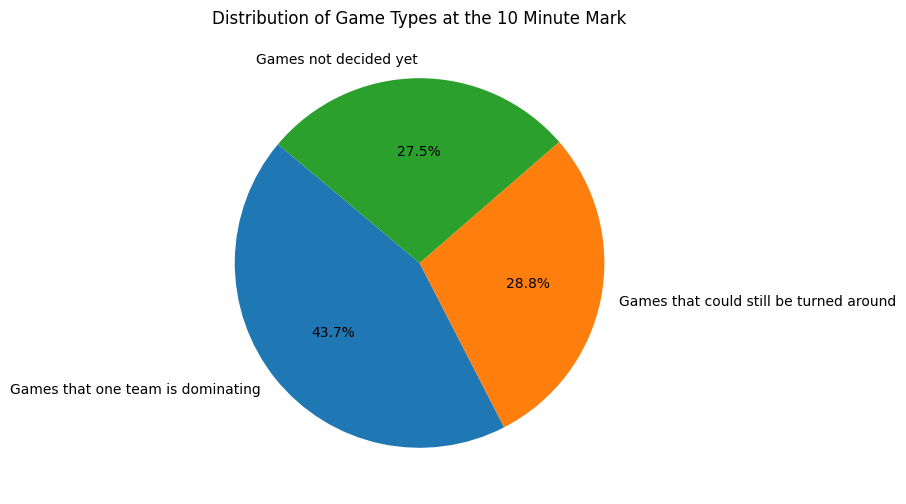

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the image provided
game_types = ['Games that one team is dominating', 'Games that could still be turned around', 'Games not decided yet']
percentages = [0.436785099706448, 0.28798461382731044, 0.27523028646624154]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=game_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Game Types at the 10 Minute Mark')
plt.show()

As I can see, there are 56.3% of the games that still not decided at the 10 minute mark. Which means if a player can make right decisions, they can significantly increase their winning chances, which is how they can climb up the ranking system!



### Correlation Matrix

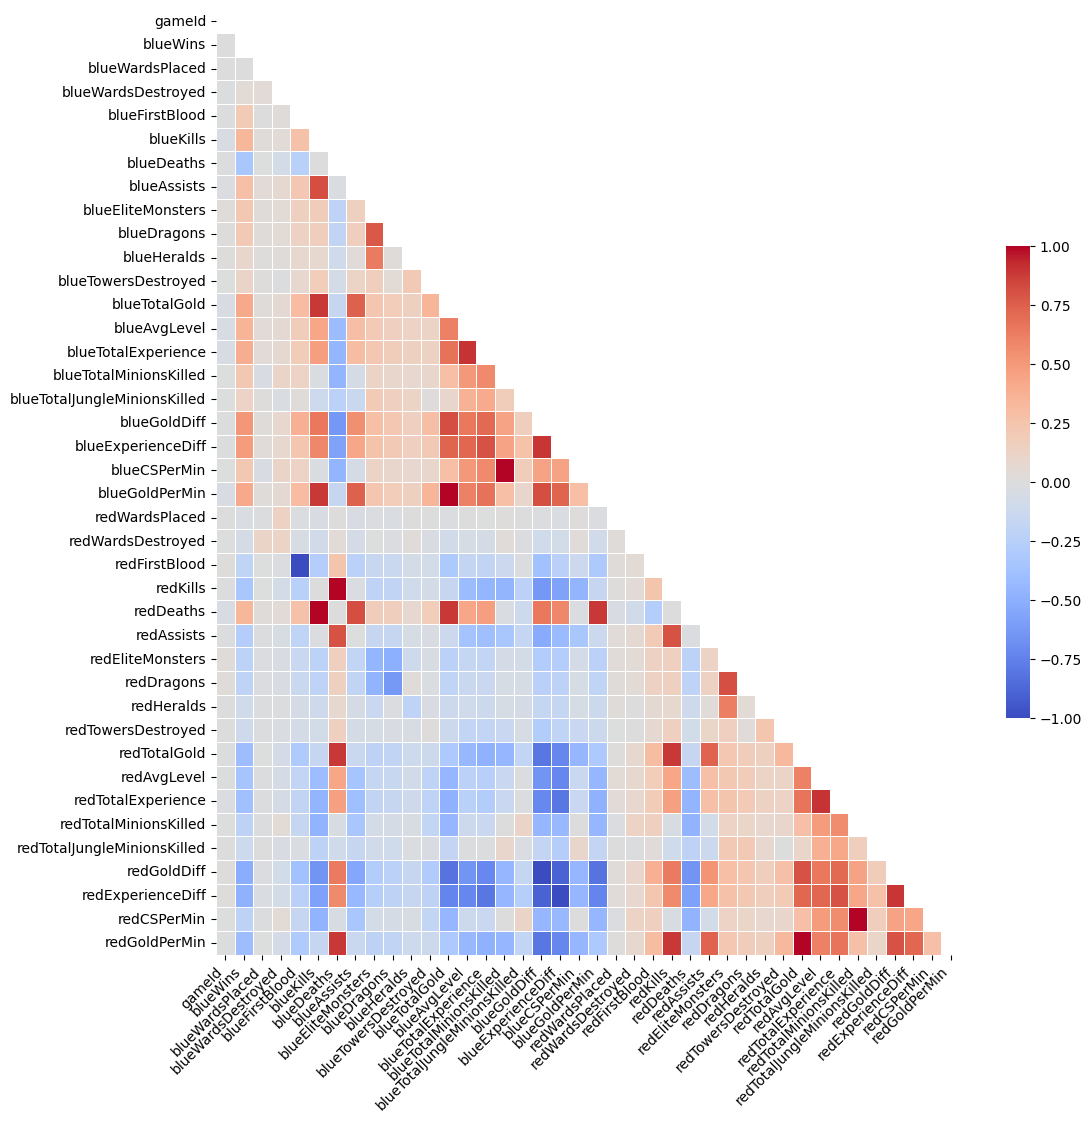

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a correlation matrix
correlation_matrix = df_normalized.corr()

# Increase the figure size because we have lots of columns
plt.figure(figsize=(15, 15))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False,
            linewidths=.5, cbar_kws={"shrink": .5})

# Improve the visibility of the labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
plt.yticks(rotation=0, fontsize=10)  # Adjust font size for y labels

# Adjust the positions of the labels
plt.subplots_adjust(left=0.28, bottom=0.25)

plt.show()

This confirms with my domain knowledge. Blue winning is mostly correlated with gold, experience and hero kills, where hero kills is just another way of gaining more gold and experiences.

A very interesting thing to consider is Elite Monsters, where it is pretty correlated with winning however in the game, it does not reflect on gold and experience that tightly. I want to see in the later model to understand how important are Elite Monsters when it compares to gold and experience.

## Generate sequence data for LSTM Model
Due to the nature of the data set I have, it is the stats for ranked games at the 10 minute mark, I cannot perform LSTM model on these data. However, I would love to try LSTM models here because they are the way to dynamically analyse in game stats as the game goes both for in game advices tools and live comentary analysis for E-sports. That is the reason why I am going to generate the data for 0 - 9 minutes for each game, they are not accurate. The purpose is just to experiment with LSTM models here.

In [ ]:
df_normalized.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
import numpy as np

# Create a function to generate sequence data for our original dataset.

def generate_sequence_data(df, time_steps=10):
    sequence_data = []

    # Identify the indices of columns to be kept unchanged
    unchanged_indices = [df.columns.get_loc(col) for col in ['gameId', 'blueWins']]

    # Define features with limited numerical ranges and their possible values
    limited_range_features = {
                              'blueEliteMonsters': [0, 1, 2],
                              'redEliteMonsters': [0, 1, 2],
                              'blueTowersDestroyed': [0, 1, 2, 3, 4],
                              'redTowersDestroyed': [0, 1, 2, 3, 4],

                              }

    for index, row in df.iterrows():
        # Initialize a template for the sequence with zeros, and the last time step as the original data
        game_sequence = np.zeros((time_steps + 1, df.shape[1]))  # +1 for the 10-minute mark
        game_sequence[-1] = row  # Set the last time step as the 10-minute mark data

        # Set unchanged columns for all time steps
        for idx in unchanged_indices:
            game_sequence[:, idx] = row[idx]

        # generate new data for features with randomness and logical sence
        for i, (feature_name, value) in enumerate(row.iteritems()):

            # handle features that has limited range of values
            if feature_name in limited_range_features:
                # Possible values for this feature, ordered from smallest to largest
                possible_values = sorted(limited_range_features[feature_name])
                # Start with zero
                current_value = 0
                game_sequence[0, i] = current_value
                # Determine a random start time to begin increasing value
                start_increase_time = np.random.randint(1, time_steps)
                # Increase the value at a random time step and keep increasing until it reaches the target value
                for t in range(1, time_steps + 1):
                    if t >= start_increase_time and current_value < value:
                        # Possible values to increase to (greater than 0 and less than or equal to target value)
                        higher_values = [v for v in possible_values if 0 < v <= value]
                        if higher_values:
                            current_value = np.random.choice(higher_values)
                    game_sequence[t, i] = current_value

            # Skip unchanged columns
            elif i in unchanged_indices:
                continue

            # numerical features
            elif feature_name in ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed', 'blueKills',
                                   'redKills', 'blueDeaths', 'redDeaths', 'blueAssists', 'redAssists',
                                   'blueAvgLevel', 'redAvgLevel', 'blueTotalGold', 'redTotalGold', 'blueTotalExperience',
                                   'redTotalExperience', 'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled',
                                   'blueGoldDiff', 'redGoldDiff', 'blueExperienceDiff', 'redExperienceDiff', 'blueCSPerMin',
                                   'redCSPerMin', 'blueGoldPerMin', 'redGoldPerMin']:
                # Create a linear interpolation to the 10-minute mark
                linear_interpolation = np.linspace(0, value, time_steps + 1)
                # Add randomness, while keeping the start and end values intact
                noise = np.random.normal(0, 0.05, time_steps + 1)
                noise[0] = noise[-1] = 0  # Ensure start and end values are not affected by noise
                game_sequence[:, i] = linear_interpolation + noise

            # categorical features (Elite Monsters, which will only be killable after 5 minutes)
            elif feature_name in ['blueDragons', 'redDragons', 'blueHeralds', 'redHeralds']:
                if value == 1:
                    # Randomly choose a time step after the minimum mark for the event
                    min_mark = 5 if feature_name in ['dragon', 'heralds'] else 2  # +1 to ensure the event is within the limits
                    time_step_of_event = np.random.randint(min_mark, time_steps + 1)
                    game_sequence[time_step_of_event:, i] = 1

            # categorical features (Others)
            elif feature_name in ['blueFirstBlood', 'redFirstBlood']:
                if value == 1:
                    # Randomly choose a time step after the minimum mark for the event
                    min_mark = 1 if feature_name in ['FirstBlood'] else 2  # +1 to ensure the event is within the limits
                    time_step_of_event = np.random.randint(min_mark, time_steps + 1)
                    game_sequence[time_step_of_event:, i] = 1

        # Add the generated sequence to the list, excluding the 10-minute mark for LSTM input
        sequence_data.append(game_sequence)

    # Convert to a 3D NumPy array (samples, time_steps, features)
    sequence_data = np.array(sequence_data)
    return sequence_data

In [ ]:
# Generate the sequence data
seq_df_normalized = generate_sequence_data(df_normalized)

<ipython-input-6-a6bf1a174c16>:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (feature_name, value) in enumerate(row.iteritems()):


In [ ]:
seq_df_normalized.shape

(9879, 11, 40)

# Data Spliting/Loading/Batching
I am going to use MLP model for our original data to predict the winning chance of blue team. And I am going to try to perform LSTM model on the sequence data I generated from the original data to experiment with it.

## Training/Validation Data Splitting
Here I split the data into train, validation and testing by 80%, 10%, 10%.

#### MLP Data (Original)

In [ ]:
# Step 1: Split the data into train, validation and test
from sklearn.model_selection import train_test_split

mlp_df_trainval, mlp_df_test = train_test_split(df_normalized, test_size=0.1, random_state=42)

mlp_df_train, mlp_df_val = train_test_split(mlp_df_trainval, test_size=0.1, random_state=42)

In [ ]:
# Make sure they are correctly splited
mlp_df_train.shape, mlp_df_val.shape, mlp_df_test.shape

((8001, 40), (890, 40), (988, 40))

In [ ]:
# Step 2: Further split train, validation and test data into features and labels
# Drop the 'gameId' column from each set
mlp_df_train = mlp_df_train.drop(columns=['gameId'])
mlp_df_val = mlp_df_val.drop(columns=['gameId'])
mlp_df_test = mlp_df_test.drop(columns=['gameId'])

# Split each set into features (X) and labels (y)
X_mlp_train = mlp_df_train.drop(columns=['blueWins'])
y_mlp_train = mlp_df_train['blueWins']

X_mlp_val = mlp_df_val.drop(columns=['blueWins'])
y_mlp_val = mlp_df_val['blueWins']

X_mlp_test = mlp_df_test.drop(columns=['blueWins'])
y_mlp_test = mlp_df_test['blueWins']

In [ ]:
print(X_mlp_train.shape, y_mlp_train.shape)
print(X_mlp_val.shape, y_mlp_val.shape)
print(X_mlp_test.shape, y_mlp_test.shape)

(8001, 38) (8001,)
(890, 38) (890,)
(988, 38) (988,)


In [ ]:
# Step 3: Convert all of them into PyTorch tensors
import torch

# Convert to NumPy arrays
X_mlp_train_np = X_mlp_train.values
y_mlp_train_np = y_mlp_train.values

X_mlp_val_np = X_mlp_val.values
y_mlp_val_np = y_mlp_val.values

X_mlp_test_np = X_mlp_test.values
y_mlp_test_np = y_mlp_test.values

# Convert to PyTorch tensors (we are using torch.long for labels since it is a classification column)
X_mlp_train_tensor = torch.tensor(X_mlp_train_np, dtype=torch.float32)
y_mlp_train_tensor = torch.tensor(y_mlp_train_np, dtype=torch.float32).unsqueeze(1)

X_mlp_val_tensor = torch.tensor(X_mlp_val_np, dtype=torch.float32)
y_mlp_val_tensor = torch.tensor(y_mlp_val_np, dtype=torch.float32).unsqueeze(1)

X_mlp_test_tensor = torch.tensor(X_mlp_test_np, dtype=torch.float32)
y_mlp_test_tensor = torch.tensor(y_mlp_test_np, dtype=torch.float32).unsqueeze(1)

# Check the tensor shapes
print(X_mlp_train_tensor.shape, y_mlp_train_tensor.shape)
print(X_mlp_val_tensor.shape, y_mlp_val_tensor.shape)
print(X_mlp_test_tensor.shape, y_mlp_test_tensor.shape)

torch.Size([8001, 38]) torch.Size([8001, 1])
torch.Size([890, 38]) torch.Size([890, 1])
torch.Size([988, 38]) torch.Size([988, 1])


#### LSTM Data (Sequence)

In [ ]:
# Step 1: Split the data into train, validation and test
from sklearn.model_selection import train_test_split

lstm_df_trainval, lstm_df_test = train_test_split(seq_df_normalized, test_size=0.1, random_state=42)

lstm_df_train, lstm_df_val = train_test_split(lstm_df_trainval, test_size=0.1, random_state=42)

In [ ]:
# Make sure they are correctly splited
lstm_df_train.shape, lstm_df_val.shape, lstm_df_test.shape

((8001, 11, 40), (890, 11, 40), (988, 11, 40))

In [ ]:
# Step 2: Further split train, validation and test data into features and labels

# Split each set into features (X) and labels (y)
# Since I am dealing with numpy arrays here with out feature names, I will use indexing to achieve my goal
X_lstm_train = lstm_df_train[:, :, 2:]
y_lstm_train = lstm_df_train[:, :, 1]
y_lstm_train = y_lstm_train[:, -1]

X_lstm_val = lstm_df_val[:, :, 2:]
y_lstm_val = lstm_df_val[:, :, 1]
y_lstm_val = y_lstm_val[:, -1]

X_lstm_test = lstm_df_test[:, :, 2:]
y_lstm_test = lstm_df_test[:, :, 1]
y_lstm_test = y_lstm_test[:, -1]

In [ ]:
print(X_lstm_train.shape, y_lstm_train.shape)
print(X_lstm_val.shape, y_lstm_val.shape)
print(X_lstm_test.shape, y_lstm_test.shape)

(8001, 11, 38) (8001,)
(890, 11, 38) (890,)
(988, 11, 38) (988,)


In [ ]:
import torch

# Convert the X numpy arrays to PyTorch tensors
X_lstm_train_tensor = torch.tensor(X_lstm_train, dtype=torch.float32)
X_lstm_val_tensor = torch.tensor(X_lstm_val, dtype=torch.float32)
X_lstm_test_tensor = torch.tensor(X_lstm_test, dtype=torch.float32)

# Convert the y numpy arrays to PyTorch tensors and add an extra dimension
y_lstm_train_tensor = torch.tensor(y_lstm_train, dtype=torch.float32).unsqueeze(1)
y_lstm_val_tensor = torch.tensor(y_lstm_val, dtype=torch.float32).unsqueeze(1)
y_lstm_test_tensor = torch.tensor(y_lstm_test, dtype=torch.float32).unsqueeze(1)

# Check the shapes
print(X_lstm_train_tensor.shape, y_lstm_train_tensor.shape)
print(X_lstm_val_tensor.shape, y_lstm_val_tensor.shape)
print(X_lstm_test_tensor.shape, y_lstm_test_tensor.shape)

torch.Size([8001, 11, 38]) torch.Size([8001, 1])
torch.Size([890, 11, 38]) torch.Size([890, 1])
torch.Size([988, 11, 38]) torch.Size([988, 1])


## Dataloading and Batching

#### MLP Dataloading/Batching

In [ ]:
# Step 1: Dataloading

from torch.utils.data import TensorDataset, DataLoader
# Create dataloader for training data
train_data_mlp = TensorDataset(X_mlp_train_tensor, y_mlp_train_tensor)
train_loader_mlp = DataLoader(train_data_mlp, batch_size=128, shuffle=True)

# Create dataloader for validation data
val_data_mlp = TensorDataset(X_mlp_val_tensor, y_mlp_val_tensor)
val_loader_mlp = DataLoader(val_data_mlp, batch_size=128, shuffle=False)

# Create dataloader for testing data
test_data_mlp = TensorDataset(X_mlp_test_tensor, y_mlp_test_tensor)
test_loader_mlp = DataLoader(test_data_mlp, batch_size=128, shuffle=False)

In [ ]:
# Step 2: obtain one batch of training data to check
dataiter_train = iter(train_loader_mlp)
features, labels = next(dataiter_train)

print('Sample input size: ', features.size()) # batch_size, seq_length
print('Sample input: \n', features)
print()
print('Sample label size: ', labels.size()) # batch_size
print('Sample label: \n', labels)

Sample input size:  torch.Size([128, 38])
Sample input: 
 tensor([[-0.4045,  1.0001,  1.0000,  ..., -0.5820, -0.7918, -0.7687],
        [-0.3490,  0.0805,  1.0000,  ..., -0.1493, -0.8831, -0.8687],
        [-0.4045, -1.2989,  0.0000,  ...,  0.3512,  0.5774, -0.2623],
        ...,
        [-0.2380,  1.0001,  0.0000,  ..., -1.8344,  0.1666, -1.5562],
        [-0.2935, -0.8391,  0.0000,  ...,  1.3875,  0.4861,  0.4903],
        [-0.7930,  0.0805,  0.0000,  ...,  1.8958, -0.2898,  1.2604]])

Sample label size:  torch.Size([128, 1])
Sample label: 
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
  

#### LSTM Dataloading/Batching

In [ ]:
# Step 1: Dataloading

from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_data_lstm = TensorDataset(X_lstm_train_tensor, y_lstm_train_tensor)
val_data_lstm = TensorDataset(X_lstm_val_tensor, y_lstm_val_tensor)
test_data_lstm = TensorDataset(X_lstm_test_tensor, y_lstm_test_tensor)

# Create DataLoaders
train_loader_lstm = DataLoader(train_data_lstm, batch_size=128, shuffle=True)
val_loader_lstm = DataLoader(val_data_lstm, batch_size=128, shuffle=False)
test_loader_lstm = DataLoader(test_data_lstm, batch_size=128, shuffle=False)

In [ ]:
# Step 2: obtain one batch of training data to check
dataiter_train_lstm = iter(train_loader_lstm)
features, labels = next(dataiter_train_lstm)

print('Sample input size: ', features.size()) # batch_size, time_stamp, seq_length
print('Sample input: \n', features)
print()
print('Sample label size: ', labels.size()) # batch_size, seq_length
print('Sample label: \n', labels)

Sample input size:  torch.Size([128, 11, 38])
Sample input: 
 tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-1.5432e-02,  7.5708e-02,  0.0000e+00,  ..., -2.7267e-02,
          -1.8124e-01,  4.7374e-03],
         [-1.0658e-01,  1.2317e-01,  0.0000e+00,  ..., -1.3349e-01,
          -1.9758e-01,  2.6437e-02],
         ...,
         [-2.9323e-01,  3.7945e-01,  1.0000e+00,  ..., -6.4003e-01,
          -9.6931e-01, -3.3174e-01],
         [-3.8412e-01,  4.6144e-01,  1.0000e+00,  ..., -7.0054e-01,
          -1.0772e+00, -3.9578e-01],
         [-4.0449e-01,  5.4031e-01,  1.0000e+00,  ..., -8.0750e-01,
          -1.2026e+00, -4.1725e-01]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-4.9863e-02,  1.3110e-02,  0.0000e+00,  ...,  1.2906e-01,
          -1.1280e-01,  1.1378e-01],
         [-4.5561e-02,  1.5086e-01,  0.0000e+00,  ...,  2.1433e-01,
          -2.0

### Combined Data
For trying out model blending later, I am making these dataloaders for it.

In [ ]:
# Step 1: Dataloading

from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_data_combined = TensorDataset(X_mlp_train_tensor, X_lstm_train_tensor, y_mlp_train_tensor)
val_data_combined = TensorDataset(X_mlp_val_tensor, X_lstm_val_tensor, y_mlp_val_tensor)
test_data_combined = TensorDataset(X_mlp_test_tensor, X_lstm_test_tensor, y_mlp_test_tensor)

# Create DataLoaders
train_loader_combined = DataLoader(train_data_combined, batch_size=128, shuffle=True)
val_loader_combined = DataLoader(val_data_combined, batch_size=128, shuffle=False)
test_loader_combined = DataLoader(test_data_combined, batch_size=128, shuffle=False)

In [ ]:
# Step 2: obtain one batch of training data to check
dataiter_train_combined = iter(train_loader_combined)
features_mlp, features_lstm, labels = next(dataiter_train_combined)

print('Sample input size: ', features_mlp.size()) # batch_size, time_stamp, seq_length
print('Sample input: \n', features_mlp)
print()
print('Sample input size: ', features_lstm.size()) # batch_size, time_stamp, seq_length
print('Sample input: \n', features_lstm)
print()
print('Sample label size: ', labels.size()) # batch_size, seq_length
print('Sample label: \n', labels)

Sample input size:  torch.Size([128, 38])
Sample input: 
 tensor([[-0.2935, -0.3793,  1.0000,  ...,  1.4448, -0.3811,  0.8358],
        [-0.1825,  1.4599,  1.0000,  ..., -1.0043, -0.9744,  0.1509],
        [ 1.7045, -0.8391,  0.0000,  ...,  2.1145,  1.1251,  0.4152],
        ...,
        [-0.4600, -0.3793,  0.0000,  ...,  0.5642,  1.3533,  1.0055],
        [ 3.5915,  0.5403,  1.0000,  ..., -0.1357, -0.2898,  0.2951],
        [-0.0160,  0.0805,  1.0000,  ..., -0.9262,  1.6727, -0.7902]])

Sample input size:  torch.Size([128, 11, 38])
Sample input: 
 tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-8.7886e-02, -1.4870e-01,  0.0000e+00,  ...,  1.1569e-01,
          -7.4383e-02,  1.0876e-01],
         [-1.2084e-01, -7.9349e-02,  0.0000e+00,  ...,  2.7205e-01,
          -8.2567e-02,  1.4318e-01],
         ...,
         [-3.0060e-01, -2.5487e-01,  1.0000e+00,  ...,  1.0954e+00,
          -2.3457e-01,  7.0254e-01],
         [-

# Model Training/Validation/Test
In this part, I am going to use a simple logestic regression as my benchmark, then come up with my MLP and LSTM model and train/validate them by fine tuning the hyper-parameters and save the ones with the best performances.

## Logistic Regression
I am going to use Logestic regression as a benchmark and check to see if my deep learning MLP model can out perform the simple machine learning model.

In [ ]:
# Prepare data
print(X_mlp_train_np.shape ,y_mlp_train_np.shape)
print(X_mlp_val_np.shape ,y_mlp_val_np.shape)

(8001, 38) (8001,)
(890, 38) (890,)


I have already prepared the data in my Data Splitting/Loading/Batching stage. After checking, they are indeed in the correct format to perform Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_mlp_train_np, y_mlp_train_np)

# Validate the model with the validation data
y_val_pred = log_reg_model.predict(X_mlp_val_np)
val_accuracy = accuracy_score(y_mlp_val_np, y_val_pred)

# Validate the model with the testing data
y_test_pred = log_reg_model.predict(X_mlp_test_np)
test_accuracy = accuracy_score(y_mlp_test_np, y_test_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Validation Accuracy: 0.7337078651685394
Testing Accuracy: 0.728744939271255


## MLP Model
For binary classicication problems, like here in our situation, MLP is the deep learning model to go.

### Create classes and functions to train/validate/plot

**Here I define a MLP model with model creation, training and validation**

In [ ]:
import torch
import torch.nn as nn
from torch.nn import BCELoss
import torch.optim as optim
import numpy as np

# Create Class to automate model creation, training and validation
class MLPFactorization(object):

    # Inner class defining the MLP model
    class MLP(nn.Module):
        def __init__(self, input_dim, hidden_dims, output_dim=1, dropout_prob=0.5):
            super().__init__()
            # Define the architecture of the MLP with dropout layers
            layers = []
            for hidden_dim in hidden_dims:
                layers.append(nn.Linear(input_dim, hidden_dim))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout_prob))
                input_dim = hidden_dim  # Set input dimension for the next layer

            layers.append(nn.Linear(hidden_dims[-1], output_dim))  # Output layer
            self.layers = nn.Sequential(*layers)

        def forward(self, x):
            # Pass the input through the layers
            x = self.layers(x)
            # Apply Sigmoid at the end
            x = torch.sigmoid(x)
            return x

    # Define initialization of the model
    def __init__(self, input_dim, hidden_dims, learning_rate=1e-2, dropout_prob=0.5, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
                 n_iter=10, l2=0.0, random_state=None):
        self._learning_rate = learning_rate
        self._n_iter = n_iter
        self._l2 = l2
        self._device = device
        self._model = self.MLP(input_dim, hidden_dims, dropout_prob=dropout_prob).to(device)
        self._optimizer = optim.Adam(self._model.parameters(), lr=self._learning_rate, weight_decay=self._l2)
        self._loss_func = BCELoss()
        self._random_state = random_state or np.random.RandomState()

    # Define training function
    def fit(self, train_loader, val_loader, verbose=True):

        valid_loss_min = np.Inf # track change in validation loss
        train_losses, valid_losses, valid_accs =[], [], [] # track train losses, valid loss, and valid accuracies over epoches

        for epoch in range(self._n_iter):
            self._model.train()
            total_train_loss = 0

            ###################
            # train the model #
            ###################
            for features, labels in train_loader:

                # Move tensors to GPU
                features, labels = features.to(self._device), labels.to(self._device)

                #1. Get predicted ratings using the model
                output = self._model(features)
                #2. Calculate loss using the loss function we just defined
                loss = self._loss_func(output, labels)
                #3. Zero out gradients
                self._optimizer.zero_grad()
                #4. Compute gradients
                loss.backward()
                #5. Update weights
                self._optimizer.step()

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)

            avg_val_loss, val_accuracy = self.validate(val_loader)

            # save train/validation loss and accuracy
            train_losses.append(avg_train_loss)
            valid_losses.append(avg_val_loss)
            valid_accs.append(val_accuracy)

            # print progress
            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}, accuracy_val {}'.format(epoch, avg_train_loss, avg_val_loss, val_accuracy))

            if np.isnan(avg_train_loss) or avg_train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(avg_train_loss))

            # save model if validation loss has decreased
            if avg_val_loss < valid_loss_min:
                print(f'Validation loss decreased ({valid_loss_min:.6f} --> {avg_val_loss:.6f}). Saving model...')
                torch.save(self._model.state_dict(), 'model_mlp.pth')
                valid_loss_min = avg_val_loss

        return train_losses, valid_losses, valid_accs

    ###########################
    # validate/Test the model #
    ###########################
    def validate(self, val_loader, verbose=False):
        self._model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in val_loader:
                # Move tensors to GPU
                features, labels = features.to(self._device), labels.to(self._device)

                #1. Calculate Predictions
                output = self._model(features)
                #2. Calculate Loss
                loss = self._loss_func(output, labels)

                total_val_loss += loss.item()

                predicted = (output > 0.5).float()  # Threshold at 0.5
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct / total

        if verbose:
            print(f"Test Loss: {avg_val_loss}")
            print(f"Test Accuracy: {val_accuracy}")

        return avg_val_loss, val_accuracy

**Here I define a function to plot the training and validation losses**

In [ ]:
# Define a function to plot train and valid losses
import matplotlib.pyplot as plt
def plot_losses(train_losses, valid_losses, num_epochs):
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, num_epochs + 1), train_losses, label='train')
    plt.plot(range(1, num_epochs + 1), valid_losses, label='validation')
    plt.title('Plot of training and validation Losses')
    plt.xlabel('epoch')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()

### Training/Validation
Here I train the model with our 80% of the training data and validate it with the 10% randomly selected validation data.

#### Manually

In [ ]:
# Define the input dimension of features and the hidden layer sizes
input_dim = X_mlp_train_tensor.shape[1]
hidden_dims = [256, 128, 64, 32, 16]

# Instantiate the MLPFactorization with defined MLP model
factorization_model = MLPFactorization(input_dim, hidden_dims, learning_rate=0.00005, dropout_prob=0.2, n_iter=50, l2=1e-5, random_state=42)

In [ ]:
# Fit the model using training and validation data loaders
train_losses, valid_losses, valid_accs = factorization_model.fit(train_loader_mlp, val_loader_mlp)

Epoch 0: loss_train 0.688594673361097, loss_val 0.6795475312641689, accuracy_val 0.5550561797752809
Validation loss decreased (inf --> 0.679548). Saving model...
Epoch 1: loss_train 0.6508871106401323, loss_val 0.5955045350960323, accuracy_val 0.7426966292134831
Validation loss decreased (0.679548 --> 0.595505). Saving model...
Epoch 2: loss_train 0.570633579932508, loss_val 0.530261293053627, accuracy_val 0.7438202247191011
Validation loss decreased (0.595505 --> 0.530261). Saving model...
Epoch 3: loss_train 0.5533704480954579, loss_val 0.524866812995502, accuracy_val 0.7415730337078652
Validation loss decreased (0.530261 --> 0.524867). Saving model...
Epoch 4: loss_train 0.5499866503098655, loss_val 0.5245739540883473, accuracy_val 0.7382022471910112
Validation loss decreased (0.524867 --> 0.524574). Saving model...
Epoch 5: loss_train 0.547194011154629, loss_val 0.5239342131784984, accuracy_val 0.7415730337078652
Validation loss decreased (0.524574 --> 0.523934). Saving model...
Ep

Here the best one I found manually is with 74% accuracy.

Which suggested a vague range on what should I used for Bayesine Optimization.
I am going to try 1-5 hidden layers, 0.00001-0.000001 for learning rate, 0.2-0.3 drop out probability, 0.0001-0.000001 for l2 regularization, 16, 32, 64, 128, 256, 512 for hidden layer sizes.

#### Bayesine Optimization

In [ ]:
!pip install optuna

In [ ]:
import optuna
import torch
import numpy as np

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters using Optuna's API
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
    dropout_prob = trial.suggest_categorical("dropout_prob", [0.2, 0.25, 0.3])
    l2 = trial.suggest_float("l2", 1e-6, 1e-4, log=True)

    # Suggest the number of layers and the number of neurons in each layer
    n_layers = trial.suggest_int("n_layers", 1, 2)
    hidden_dims = []
    for i in range(n_layers):
        hidden_dim = trial.suggest_categorical(f"n_units_l{i}", [16, 32])
        hidden_dims.append(hidden_dim)

    # Initialize the model with the suggested hyperparameters
    factorization_model = MLPFactorization(input_dim=X_mlp_train_tensor.shape[1],  # Define your input_dim based on your dataset
                                          hidden_dims=hidden_dims,
                                          learning_rate=learning_rate,
                                          dropout_prob=dropout_prob,
                                          n_iter=100,  # Number of epochs for each trial
                                          l2=l2,
                                          random_state=42
                                          )

    # Train and validate the model
    train_losses, valid_losses, valid_accs = factorization_model.fit(train_loader_mlp, val_loader_mlp)

    # Return the best validation accuracy
    return np.max(valid_accs)

# Create a study object and specify the optimization direction
study = optuna.create_study(direction="maximize")

# Optimize the study, specifying the number of trials
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print("Best trial:")
trial = study.best_trial
print(f" Value: {trial.value}")
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


Bayesine optimization found these as the best hyper-parameter:

Best trial:

Value: 0.749438202247191

Params:

    batch_size: 128
    learning_rate: 4.23494221749033e-05
    dropout_prob: 0.2
    l2: 1.642077766718161e-06
    n_layers: 1
    n_units_l0: 32

#### Manually tuning Bayesine Optimization's findings
Here I am going to further tune the finding from bayesine optimization trying to achieve the best accuracy.

In [ ]:
# Define the input dimension of features and the hidden layer sizes
input_dim = X_mlp_train_tensor.shape[1]
hidden_dims = [32]

# Instantiate the MLPFactorization with defined MLP model
factorization_model = MLPFactorization(input_dim, hidden_dims, learning_rate=2.5e-05, dropout_prob=0.1, n_iter=100, l2=1.64e-06, random_state=42)

In [ ]:
# Fit the model using training and validation data loaders
train_losses, valid_losses, valid_accs = factorization_model.fit(train_loader_mlp, val_loader_mlp)

Epoch 0: loss_train 0.7340062553920443, loss_val 0.7271978173937116, accuracy_val 0.3865168539325843
Validation loss decreased (inf --> 0.727198). Saving model...
Epoch 1: loss_train 0.7230546219008309, loss_val 0.7160816022327968, accuracy_val 0.41460674157303373
Validation loss decreased (0.727198 --> 0.716082). Saving model...
Epoch 2: loss_train 0.7125892412094843, loss_val 0.7053716012409755, accuracy_val 0.45617977528089887
Validation loss decreased (0.716082 --> 0.705372). Saving model...
Epoch 3: loss_train 0.7031713194317288, loss_val 0.6953034060341972, accuracy_val 0.4943820224719101
Validation loss decreased (0.705372 --> 0.695303). Saving model...
Epoch 4: loss_train 0.6937597479139056, loss_val 0.6856724449566433, accuracy_val 0.5382022471910113
Validation loss decreased (0.695303 --> 0.685672). Saving model...
Epoch 5: loss_train 0.6844351471416534, loss_val 0.6763724429266793, accuracy_val 0.5831460674157304
Validation loss decreased (0.685672 --> 0.676372). Saving mode

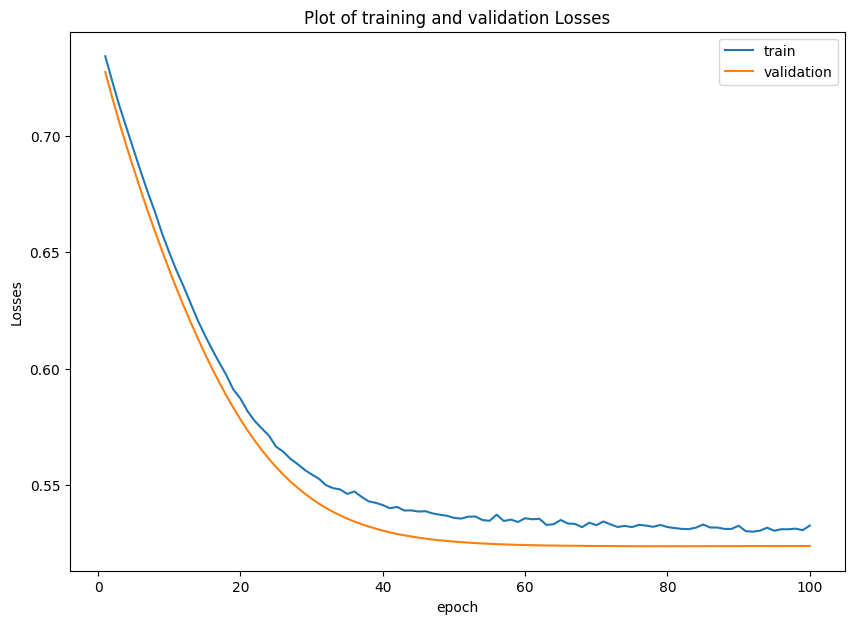

In [ ]:
# Plot the train and valid losses for 100 epochs training
plot_losses(train_losses, valid_losses, num_epochs=100)

Here is the visualization for my model trainig over 100 epochs. It started to over fit since 52th epoch and my code algorithm caught that and only saved the model at that epoch.

### Testing
Here I test the model I just trained on the testing 10% dataset, and see how is the model performing in terms of loss and accuracy.

In [ ]:
# Initialize MLPFactorization class
input_dim = X_mlp_train_tensor.shape[1]
hidden_dims = [32]
mlp = MLPFactorization(input_dim, hidden_dims)

# Load the trained model
model_path = 'model_mlp.pth'
mlp._model.load_state_dict(torch.load(model_path))

# Use the validate function on the test loader
avg_test_loss, test_accuracy = mlp.validate(test_loader_mlp, verbose=True)

Test Loss: 0.5380376130342484
Test Accuracy: 0.7307692307692307


My benchmark from logestic regression was:

*   Validation Accuracy: 0.7337078651685394
*   Testing Accuracy: 0.728744939271255

After hours of ajusting hyper-parameter, the result I got from my MLP model is:

*   Validation Accuracy: 0.7337078651685394
*   Testing Accuracy: 0.7307692307692307

I'll have to say I am a little disappointed because it seems like a waste of time hyper-tuning my model to see it only beat the benchmark by a very small number. However, the reason behind mainly could be because that the dataset was very small (only less than 10000rows), and for my simple binary classification problem, normally for a small dataset like this, logestic regression typically performs pretty well, and deep learning does not have a big advantages here.

It is worth mentioning that due to the simplicity of my dataset, there is no benefit adding more layers as well.

## LSTM Model
I do understand that LSTM models are typically for longer time series data to avoid vanishing gradient, however, I would like to experiment with it to get familiar. The purpose of using this model is just to experiment with it.

### Create classes and functions to train/validate/plot

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import BCELoss
# Create the class to create the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim=1, num_layers=1, dropout_prob=0.5):
        super().__init__()
        # Define the LSTM architecture
        self.lstm = nn.LSTM(input_dim, hidden_dims, num_layers=num_layers,
                            dropout=dropout_prob, batch_first=True)
        self.output_layer = nn.Linear(hidden_dims, output_dim)

    def forward(self, x):
        # Pass the input through the LSTM layers
        lstm_out, (h_n, c_n) = self.lstm(x)
        # Take the last hidden state for the last time step
        last_time_step = lstm_out[:, -1, :]
        # Pass the last hidden state of the last time step through the output layer
        x = self.output_layer(last_time_step)
        # Apply Sigmoid at the end
        x = torch.sigmoid(x)
        return x

In [ ]:
class LSTMFactorization:
    def __init__(self, input_dim, hidden_dims, learning_rate=1e-2, num_layers=1,
                 dropout_prob=0.5, device=None, n_iter=10, l2=0.0, random_state=None):
        self._learning_rate = learning_rate
        self._n_iter = n_iter
        self._l2 = l2
        self._device = device if device else torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self._model = LSTMModel(input_dim, hidden_dims, num_layers=num_layers,
                                dropout_prob=dropout_prob).to(self._device)
        self._optimizer = optim.Adam(self._model.parameters(), lr=self._learning_rate, weight_decay=self._l2)
        self._loss_func = BCELoss()
        self._random_state = random_state or np.random.RandomState()

    # Define training function
    def fit(self, train_loader, val_loader, verbose=True):

        valid_loss_min = np.Inf # track change in validation loss
        train_losses, valid_losses, valid_accs =[], [], [] # track train losses, valid loss, and valid accuracies over epoches

        for epoch in range(self._n_iter):
            self._model.train()
            total_train_loss = 0

            ###################
            # train the model #
            ###################
            for features, labels in train_loader:

                # Move tensors to GPU
                features, labels = features.to(self._device), labels.to(self._device)

                #1. Get predicted ratings using the model
                output = self._model(features)
                #2. Calculate loss using the loss function we just defined
                loss = self._loss_func(output, labels)
                #3. Zero out gradients
                self._optimizer.zero_grad()
                #4. Compute gradients
                loss.backward()
                #5. Update weights
                self._optimizer.step()

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)

            avg_val_loss, val_accuracy = self.validate(val_loader)

            # save train/validation loss and accuracy
            train_losses.append(avg_train_loss)
            valid_losses.append(avg_val_loss)
            valid_accs.append(val_accuracy)

            # print progress
            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}, accuracy_val {}'.format(epoch, avg_train_loss, avg_val_loss, val_accuracy))

            if np.isnan(avg_train_loss) or avg_train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(avg_train_loss))

            # save model if validation loss has decreased
            if avg_val_loss < valid_loss_min:
                print(f'Validation loss decreased ({valid_loss_min:.6f} --> {avg_val_loss:.6f}). Saving model...')
                torch.save(self._model.state_dict(), 'model_lstm.pth')
                valid_loss_min = avg_val_loss

        return train_losses, valid_losses, valid_accs

    ###########################
    # validate/Test the model #
    ###########################
    def validate(self, val_loader, verbose=False):
        self._model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in val_loader:
                # Move tensors to GPU
                features, labels = features.to(self._device), labels.to(self._device)

                #1. Calculate Predictions
                output = self._model(features)
                #2. Calculate Loss
                loss = self._loss_func(output, labels)

                total_val_loss += loss.item()

                predicted = (output > 0.5).float()  # Threshold at 0.5
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct / total

        if verbose:
            print(f"Test Loss: {avg_val_loss}")
            print(f"Test Accuracy: {val_accuracy}")

        return avg_val_loss, val_accuracy

In [ ]:
# Define a function to plot train and valid losses
import matplotlib.pyplot as plt
def plot_losses(train_losses, valid_losses, num_epochs):
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, num_epochs + 1), train_losses, label='train')
    plt.plot(range(1, num_epochs + 1), valid_losses, label='validation')
    plt.title('Plot of training and validation Losses')
    plt.xlabel('epoch')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()

### Train/Validation
I am not going to use any optimization techniques here because this is just a model of experiment, however, I am still going to manually tune the hyper-parameters to optimize the model performance.

In [ ]:
# Create the model instance
lstm_factorization_model = LSTMFactorization(input_dim=38,
                                             hidden_dims=64,
                                             learning_rate=0.000029,
                                             num_layers=1,
                                             dropout_prob=0,
                                             n_iter=150,
                                             l2=0.0001)

In [ ]:
# Now train the model
train_losses, valid_losses, valid_accs = lstm_factorization_model.fit(train_loader_lstm, val_loader_lstm)


Epoch 0: loss_train 0.6904973766160389, loss_val 0.682396377835955, accuracy_val 0.6191011235955056
Validation loss decreased (inf --> 0.682396). Saving model...
Epoch 1: loss_train 0.6746129563876561, loss_val 0.6665080870900836, accuracy_val 0.7044943820224719
Validation loss decreased (0.682396 --> 0.666508). Saving model...
Epoch 2: loss_train 0.6596836495021033, loss_val 0.6512279169900077, accuracy_val 0.7280898876404495
Validation loss decreased (0.666508 --> 0.651228). Saving model...
Epoch 3: loss_train 0.6447677839370001, loss_val 0.6359553337097168, accuracy_val 0.7393258426966293
Validation loss decreased (0.651228 --> 0.635955). Saving model...
Epoch 4: loss_train 0.6297128446518429, loss_val 0.6202424083437238, accuracy_val 0.7415730337078652
Validation loss decreased (0.635955 --> 0.620242). Saving model...
Epoch 5: loss_train 0.6145708797469972, loss_val 0.6043503539902824, accuracy_val 0.7426966292134831
Validation loss decreased (0.620242 --> 0.604350). Saving model..

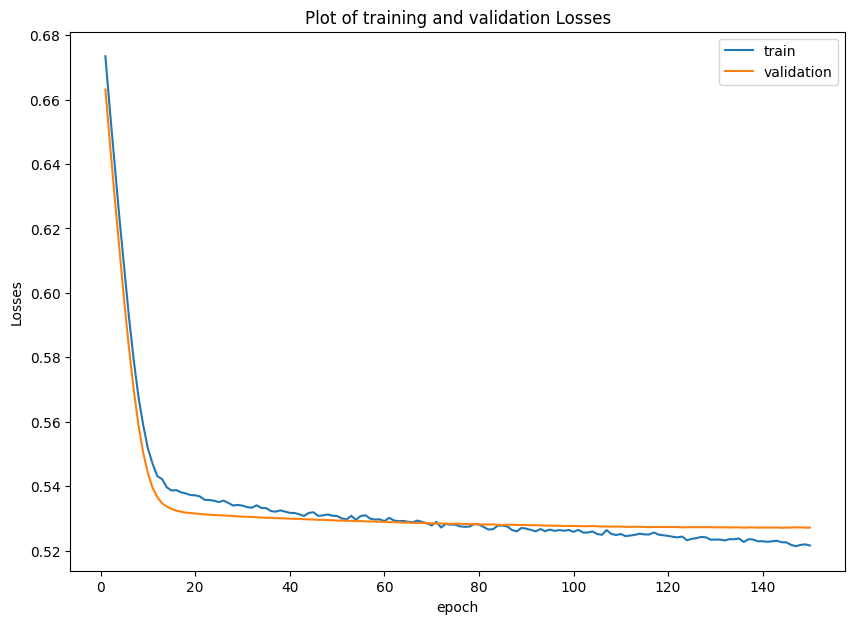

In [ ]:
# Plot the train and valid losses for 100 epochs training
plot_losses(train_losses, valid_losses, num_epochs=150)

### Testing

In [ ]:
test_loss, test_accuracy = lstm_factorization_model.validate(test_loader_lstm, verbose = True)

Test Loss: 0.5393886566162109
Test Accuracy: 0.7267206477732794


## Methods to combine models
I am going to try averaging, weighted averaging, ensemble learning, and stacking both models together.

### Averaging

In [ ]:
# Loading MLP model
# Initialize MLPFactorization class
# Using the same hyper-parameters
input_dim = X_mlp_train_tensor.shape[1]
hidden_dims = [32]
mlp = MLPFactorization(input_dim, hidden_dims)

# Load the trained model
model_path = 'model_mlp.pth'
mlp._model.load_state_dict(torch.load(model_path))

# Use the validate function on the test loader
avg_test_loss, test_accuracy = mlp.validate(test_loader_mlp, verbose=True)

Test Loss: 0.5380376130342484
Test Accuracy: 0.7307692307692307


In [ ]:
# Loading LSTM model
# Initialize LSTMFactorization class
# Using the same hyper-parameters
# Recreate the model instance with the same parameters
lstm_model = LSTMFactorization(input_dim=38, hidden_dims=64, num_layers=1, dropout_prob=0)

# Load the trained model
lstm_model._model.load_state_dict(torch.load('model_lstm.pth'))

# Use the validate function on the test loader
avg_test_loss, test_accuracy = lstm_model.validate(test_loader_lstm, verbose=True)

Test Loss: 0.5395119823515415
Test Accuracy: 0.728744939271255


In [ ]:
import torch

# Check if GPU is available and then move the models and tensors to the GPU
if torch.cuda.is_available():
    mlp._model.to('cuda')
    lstm_model._model.to('cuda')
    X_mlp_test_tensor = X_mlp_test_tensor.to('cuda')
    X_lstm_test_tensor = X_lstm_test_tensor.to('cuda')
    y_mlp_test_tensor = y_mlp_test_tensor.to('cuda')

    # Pass test data through models
    with torch.no_grad():
        mlp_outputs = mlp._model(X_mlp_test_tensor).squeeze()
        lstm_outputs = lstm_model._model(X_lstm_test_tensor).squeeze()

    # Average the outputs
    combined_outputs = (mlp_outputs + lstm_outputs) / 2

    # Threshold the outputs to get binary predictions
    predictions = (combined_outputs >= 0.5).float()

    # Calculate the accuracy
    true_labels = y_mlp_test_tensor.squeeze()
    accuracy = (predictions == true_labels).float().mean()

    print(f"Accuracy on the testing data: {accuracy.item()}")
else:
    print("CUDA is not available. Check your GPU settings.")


Accuracy on the testing data: 0.7277328372001648


### Weighted Average

In [ ]:
import torch
from sklearn.metrics import accuracy_score

def find_best_weights(mlp_model, lstm_model, X_mlp_val, X_lstm_val, y_val, weight_range):
    best_acc = 0.0
    best_weights = (0, 0)

    # Convert validation labels to CPU numpy array for use with sklearn metrics
    y_val_np = y_val.cpu().numpy()

    # Iterate over weight combinations in the specified range
    for weight_mlp in weight_range:
        for weight_lstm in weight_range:
            with torch.no_grad():
                # Get predictions from both models
                mlp_outputs = mlp_model(X_mlp_val).squeeze()
                lstm_outputs = lstm_model(X_lstm_val).squeeze()

                # Weighted average of outputs
                combined_outputs = (weight_mlp * mlp_outputs + weight_lstm * lstm_outputs) / (weight_mlp + weight_lstm)
                combined_outputs_np = combined_outputs.cpu().numpy()

                # Convert to binary predictions
                predictions = (combined_outputs_np >= 0.5).astype(int)

                # Calculate accuracy
                acc = accuracy_score(y_val_np, predictions)

                # Update best weights if current weights give a better accuracy
                if acc > best_acc:
                    best_acc = acc
                    best_weights = (weight_mlp, weight_lstm)

    return best_weights, best_acc

# Usage:
# Assuming your validation datasets are correctly setup and on the 'cuda' device.
best_weights, best_accuracy = find_best_weights(
    mlp._model.to('cuda'),
    lstm_model._model.to('cuda'),
    X_mlp_test_tensor.to('cuda'),
    X_lstm_test_tensor.to('cuda'),
    y_mlp_test_tensor.to('cuda'),
    weight_range=np.linspace(0.1, 1.0, 10)  # Example range of weights from 0.1 to 1.0
)

print(f"Best Weights: MLP {best_weights[0]}, LSTM {best_weights[1]} with accuracy {best_accuracy}")


Best Weights: MLP 0.5, LSTM 0.1 with accuracy 0.7327935222672065


### Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_stacking_model(mlp_model, lstm_model, X_mlp_val, X_lstm_val, y_val, X_mlp_test, X_lstm_test, y_test):
    # Ensure models are in eval mode and tensors are on the correct device

    X_mlp_val = X_mlp_val.to('cuda')
    X_lstm_val = X_lstm_val.to('cuda')
    y_val = y_val.to('cuda')

    # Generate predictions for the validation set
    with torch.no_grad():
        mlp_val_outputs = mlp_model(X_mlp_val).squeeze().cpu().numpy()
        lstm_val_outputs = lstm_model(X_lstm_val).squeeze().cpu().numpy()

    # Stack the predictions to create a new dataset for training the stacking model
    stacked_val_predictions = np.column_stack((mlp_val_outputs, lstm_val_outputs))

    # Train the logistic regression model as a stacking model
    stacking_model = LogisticRegression()
    stacking_model.fit(stacked_val_predictions, y_val.cpu().numpy())

    # Now generate predictions for the test set
    with torch.no_grad():
        mlp_test_outputs = mlp_model(X_mlp_test.to('cuda')).squeeze().cpu().numpy()
        lstm_test_outputs = lstm_model(X_lstm_test.to('cuda')).squeeze().cpu().numpy()

    # Stack the predictions
    stacked_test_predictions = np.column_stack((mlp_test_outputs, lstm_test_outputs))

    # Make predictions with the stacking model
    test_predictions = stacking_model.predict(stacked_test_predictions)

    # Calculate the accuracy of the stacking model on the test set
    accuracy = accuracy_score(y_test.cpu().numpy(), test_predictions)

    return accuracy

# Use the function to train the stacking model and evaluate its performance
accuracy = train_stacking_model(
    mlp_model=mlp._model,
    lstm_model=lstm_model._model,
    X_mlp_val=X_mlp_val_tensor,
    X_lstm_val=X_lstm_val_tensor,
    y_val=y_mlp_val_tensor,
    X_mlp_test=X_mlp_test_tensor,
    X_lstm_test=X_lstm_test_tensor,
    y_test=y_mlp_test_tensor
)

print(f"Stacking model accuracy on the test data: {accuracy}")


Stacking model accuracy on the test data: 0.7338056680161943


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Blending

In [ ]:
# Class defining the MLP model
class MLP2(nn.Module):
        def __init__(self, input_dim, hidden_dims, output_dim_mlp, dropout_prob=0.5):

            super().__init__()
            # Define the architecture of the MLP with dropout layers
            layers = []
            for hidden_dim in hidden_dims:
                layers.append(nn.Linear(input_dim, hidden_dim))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout_prob))
                input_dim = hidden_dim  # Set input dimension for the next layer

            layers.append(nn.Linear(hidden_dims[-1], output_dim_mlp))  # Output layer
            self.layers = nn.Sequential(*layers)

        def forward(self, x):
            # Pass the input through the layers
            x = self.layers(x)

            return x

In [ ]:
#Class defining the LSTM model
class LSTM2(nn.Module):
        def __init__(self, input_dim, hidden_dims, output_dim_lstm, num_layers=1):

            super().__init__()
            # Define the LSTM architecture
            self.lstm = nn.LSTM(input_dim, hidden_dims, num_layers=num_layers, batch_first=True)
            self.output_layer = nn.Linear(hidden_dims, output_dim_lstm)

        def forward(self, x):
            # Pass the input through the LSTM layers
            lstm_out, (h_n, c_n) = self.lstm(x)
            # Take the last hidden state for the last time step
            last_time_step = lstm_out[:, -1, :]
            # Pass the last hidden state of the last time step through the output layer
            x = self.output_layer(last_time_step)

            return x

In [ ]:
import torch
import torch.nn as nn
from torch.nn import BCELoss
import torch.optim as optim
import numpy as np

# Create Class to automate model creation, training and validation
class CombinedModelFactory:

    def __init__(self, input_dim_mlp, hidden_dims_mlp, output_dim_mlp, input_dim_lstm, hidden_dims_lstm,
                 output_dim_lstm, num_layers_lstm, combined_output_size,
                 device=None, n_epochs=10, learning_rate=0.001, dropout_prob=0.5, weight_decay=1e-5):

        self._device = device if device else torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self._model = CombinedModel(input_dim_mlp, hidden_dims_mlp, output_dim_mlp, input_dim_lstm, hidden_dims_lstm, output_dim_lstm, num_layers_lstm, combined_output_size, dropout_prob).to(self._device)
        self._n_epochs = n_epochs
        self.lr = learning_rate
        self.weight_decay = weight_decay
        self._loss_func = BCELoss()
        self._optimizer = optim.Adam(self._model.parameters(), lr=self.lr, weight_decay=self.weight_decay)

    # Define training function
    def fit(self, train_loader, val_loader, verbose=True):

        valid_loss_min = np.Inf # track change in validation loss
        train_losses, valid_losses, valid_accs =[], [], [] # track train losses, valid loss, and valid accuracies over epoches

        for epoch in range(self._n_epochs):
            self._model.train()
            total_train_loss = 0

            ###################
            # train the model #
            ###################
            for x_mlp, x_lstm, y in train_loader:

                # Move tensors to GPU
                x_mlp, x_lstm, y = x_mlp.to(self._device), x_lstm.to(self._device), y.to(self._device)

                #1. Get predicted ratings using the model
                outputs = self._model.forward(x_mlp, x_lstm)
                #2. Calculate loss using the loss function we just defined
                loss = self._loss_func(outputs, y)
                #3. Zero out gradients
                self._optimizer.zero_grad()
                #4. Compute gradients
                loss.backward()
                #5. Update weights
                self._optimizer.step()

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)

            avg_val_loss, val_accuracy = self.validate(val_loader)

            # save train/validation loss and accuracy
            train_losses.append(avg_train_loss)
            valid_losses.append(avg_val_loss)
            valid_accs.append(val_accuracy)

            # print progress
            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}, accuracy_val {}'.format(epoch, avg_train_loss, avg_val_loss, val_accuracy))

            if np.isnan(avg_train_loss) or avg_train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(avg_train_loss))

            # save model if validation loss has decreased
            if avg_val_loss < valid_loss_min:
                print(f'Validation loss decreased ({valid_loss_min:.6f} --> {avg_val_loss:.6f}). Saving model...')
                torch.save(self._model.state_dict(), 'model_combined.pth')
                valid_loss_min = avg_val_loss

        return train_losses, valid_losses, valid_accs


    def validate(self, val_loader, verbose=False):
        self._model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for x_mlp, x_lstm, y in val_loader:
                # Move tensors to GPU
                x_mlp, x_lstm, y = x_mlp.to(self._device), x_lstm.to(self._device), y.to(self._device)

                #1. Calculate Predictions
                outputs = self._model.forward(x_mlp, x_lstm)
                #2. Calculate Loss
                loss = self._loss_func(outputs, y)

                total_val_loss += loss.item()

                predicted = torch.round(torch.sigmoid(outputs))
                total += y.size(0)
                correct += (predicted == y).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct / total

        if verbose:
            print(f"Test Loss: {avg_val_loss}")
            print(f"Test Accuracy: {val_accuracy}")

        return avg_val_loss, val_accuracy

In [ ]:
# Initialize the model factory with the specified parameters
model_factory = CombinedModelFactory(
    input_dim_mlp=38,  # Input dimension for MLP is the number of features in X_mlp_train
    hidden_dims_mlp=[32],  # Hidden layers dimensions for MLP
    output_dim_mlp = 4,
    learning_rate=0.0002,  # Learning rate for the optimizer
    n_epochs=100,  # Number of epochs to train the model
    dropout_prob=0.1,
    weight_decay=0.001# Dropout probability to prevent overfitting
)


In [ ]:
# Train the model
train_losses, valid_losses, valid_accs = model_factory.fit(train_loader_combined, val_loader_combined)

Epoch 0: loss_train 0.6749291949801974, loss_val 0.6460580485207694, accuracy_val 0.49550561797752807
Validation loss decreased (inf --> 0.646058). Saving model...
Epoch 1: loss_train 0.6088942686716715, loss_val 0.5646555423736572, accuracy_val 0.49550561797752807
Validation loss decreased (0.646058 --> 0.564656). Saving model...
Epoch 2: loss_train 0.5556948804666125, loss_val 0.5348253164972577, accuracy_val 0.49550561797752807
Validation loss decreased (0.564656 --> 0.534825). Saving model...
Epoch 3: loss_train 0.5410155086290269, loss_val 0.5295852933611188, accuracy_val 0.49550561797752807
Validation loss decreased (0.534825 --> 0.529585). Saving model...
Epoch 4: loss_train 0.5372643125435662, loss_val 0.5277034640312195, accuracy_val 0.49550561797752807
Validation loss decreased (0.529585 --> 0.527703). Saving model...
Epoch 5: loss_train 0.535341990845544, loss_val 0.5269138472420829, accuracy_val 0.49550561797752807
Validation loss decreased (0.527703 --> 0.526914). Saving m

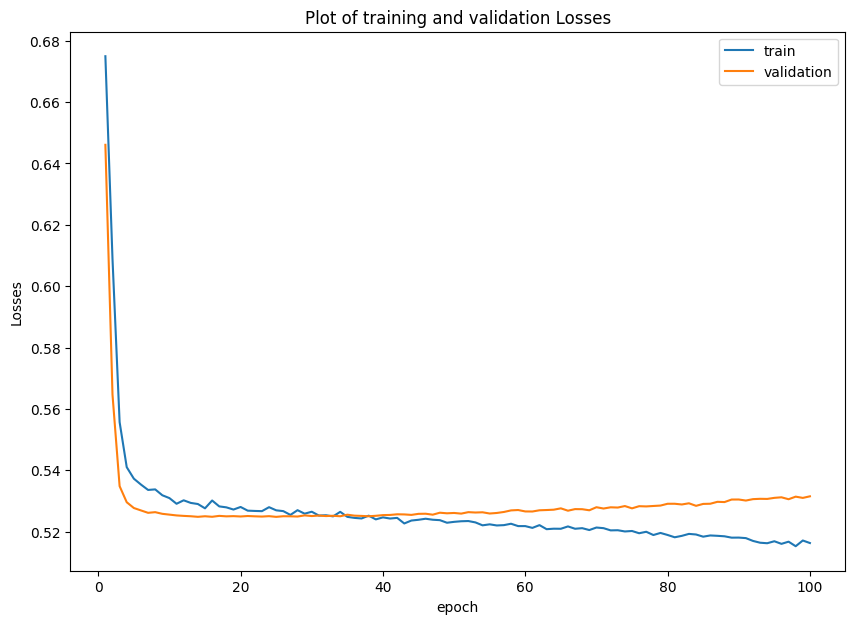

In [ ]:
# Plot losses
plot_losses(train_losses, valid_losses, num_epochs=100)

In [ ]:
test_loss, test_accuracy = model_factory.validate(test_loader_combined, verbose = True)

Test Loss: 0.5391966886818409
Test Accuracy: 0.5060728744939271


## Comparison Between Model Performances

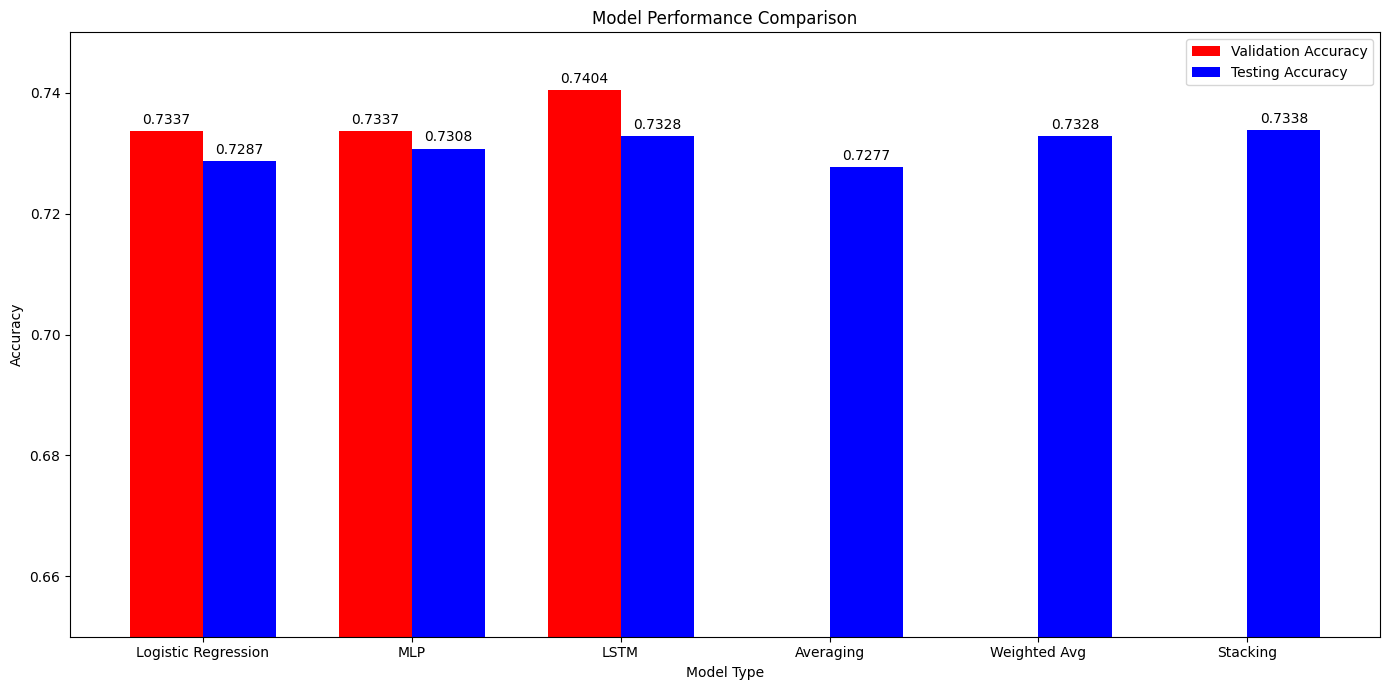

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided results
models = ['Logistic Regression', 'MLP', 'LSTM', "Averaging", "Weighted Avg", "Stacking"]
validation_accuracies = [0.7337078651685394, 0.7337078651685394, 0.7404494382022472, 0, 0, 0]
testing_accuracies = [0.728744939271255, 0.7307692307692307, 0.7327935222672065, 0.7277328372001648, 0.7327935222672065, 0.7338056680161943]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(14, 7))
bar1 = plt.bar(index, validation_accuracies, bar_width, label='Validation Accuracy', color='red')
bar2 = plt.bar(index + bar_width, testing_accuracies, bar_width, label='Testing Accuracy', color='blue')

# Add the data labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.4f}'.format(bar.get_height()),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Formatting the plot
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.ylim(0.65, 0.75)
plt.tight_layout()

# Show the plot
plt.show()


My benchmark from logestic regression was:

*   Validation Accuracy: 0.7337078651685394
*   Testing Accuracy: 0.728744939271255


My MLP model was:

*   Validation Accuracy: 0.7337078651685394
*   Testing Accuracy: 0.7307692307692307


# Model Interpretation and Evaluation

## MLP Model

### Feature Importance
Here I will use permutation importance to understand the contribution of each feature to the model's predictions.

In [ ]:
# Load the best model
input_dim = X_mlp_train_tensor.shape[1]
hidden_dims = [32]
mlp = MLPFactorization(input_dim, hidden_dims)

# Load the trained model
model_path = 'model_mlp.pth'
mlp._model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
avg_test_loss, test_accuracy = mlp.validate(test_loader_mlp, verbose=True)

Test Loss: 0.5380376130342484
Test Accuracy: 0.7307692307692307


In [ ]:
# Create a list of feature names to better understand the results
# Extract feature names from the DataFrame
feature_names = X_mlp_train.columns.tolist()

In [ ]:
import numpy as np

def calculate_feature_importance(model, data_loader, device):
    # Get baseline performance
    _, baseline_accuracy = model.validate(data_loader, verbose=False)

    # Initialize dictionary to store feature importance
    feature_importance = {}

    # Iterate through each feature
    for i in range(data_loader.dataset.tensors[0].shape[1]):
        # Save the original data
        original_data = data_loader.dataset.tensors[0][:, i].clone()

        # Permute the feature values
        permuted_data = original_data[torch.randperm(original_data.size(0))]
        data_loader.dataset.tensors[0][:, i] = permuted_data

        # Calculate performance with the permuted data
        _, permuted_accuracy = model.validate(data_loader, verbose=False)

        # Restore original data
        data_loader.dataset.tensors[0][:, i] = original_data

        # Calculate the importance as the change in performance
        importance = baseline_accuracy - permuted_accuracy
        feature_name = feature_names[i]
        feature_importance[feature_name] = importance

    # Return sorted feature importance
    return {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
feature_importance = calculate_feature_importance(mlp, test_loader_mlp, mlp._device)

# Print out feature importance
for feature, importance in feature_importance.items():
    print(f'Feature {feature}: Importance {importance}')

Feature redDragons: Importance 0.009109311740890691
Feature blueAssists: Importance 0.004048582995951344
Feature redTowersDestroyed: Importance 0.004048582995951344
Feature blueDeaths: Importance 0.002024291497975672
Feature blueEliteMonsters: Importance 0.002024291497975672
Feature blueDragons: Importance 0.002024291497975672
Feature blueGoldDiff: Importance 0.002024291497975672
Feature redHeralds: Importance 0.0010121457489877805
Feature redTotalGold: Importance 0.0010121457489877805
Feature blueTowersDestroyed: Importance -0.0010121457489878916
Feature blueTotalMinionsKilled: Importance -0.0010121457489878916
Feature blueTotalJungleMinionsKilled: Importance -0.0010121457489878916
Feature redWardsDestroyed: Importance -0.0010121457489878916
Feature redFirstBlood: Importance -0.0010121457489878916
Feature blueKills: Importance -0.002024291497975783
Feature blueCSPerMin: Importance -0.002024291497975783
Feature redGoldDiff: Importance -0.002024291497975783
Feature redCSPerMin: Importan

In [ ]:
# Sort feature_importance by absolute importance value in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True)

# Print out sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f'Feature {feature}: Importance {importance}')

Feature redAssists: Importance -0.010121457489878583
Feature redDragons: Importance 0.009109311740890691
Feature blueExperienceDiff: Importance -0.009109311740890691
Feature redDeaths: Importance -0.009109311740890691
Feature redTotalJungleMinionsKilled: Importance -0.00809716599190291
Feature blueFirstBlood: Importance -0.007085020242915019
Feature blueTotalExperience: Importance -0.006072874493927127
Feature redGoldPerMin: Importance -0.006072874493927127
Feature blueWardsDestroyed: Importance -0.005060728744939347
Feature blueHeralds: Importance -0.005060728744939347
Feature blueGoldPerMin: Importance -0.005060728744939347
Feature redAvgLevel: Importance -0.005060728744939347
Feature redTotalMinionsKilled: Importance -0.005060728744939347
Feature blueWardsPlaced: Importance -0.004048582995951455
Feature blueTotalGold: Importance -0.004048582995951455
Feature blueAvgLevel: Importance -0.004048582995951455
Feature redWardsPlaced: Importance -0.004048582995951455
Feature redKills: Impo

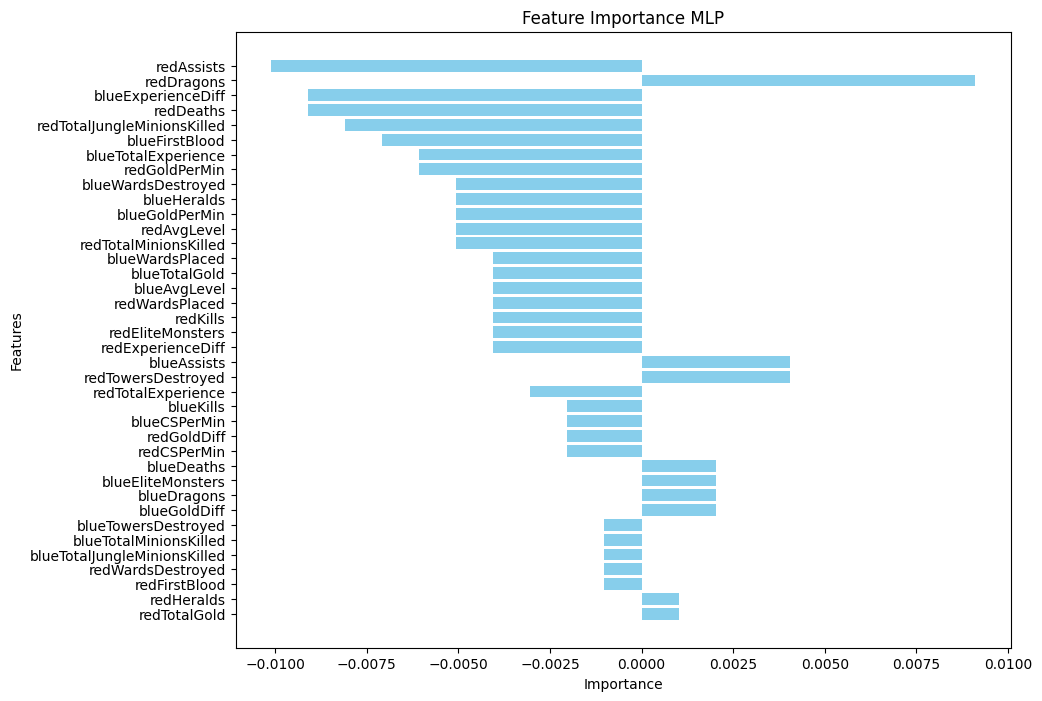

In [ ]:
import matplotlib.pyplot as plt

# Sort feature_importance by absolute importance value in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True)

# Unpack the feature names and their corresponding importances into separate lists
features, importances = zip(*sorted_feature_importance)

# Create a bar chart
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
plt.barh(features, importances, color='skyblue')  # Horizontal bar chart
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance MLP')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()

It is very interesting to see that elitemonsters is in the top of this list, this could mean that neutral jungle objectives are more important than I first expected, which are dragons and heralds. This could mean to ranked players, especially thos who plays jungle roles to take these neutral objectives more seriously since they have a very high importance.

### Confusion Matrix

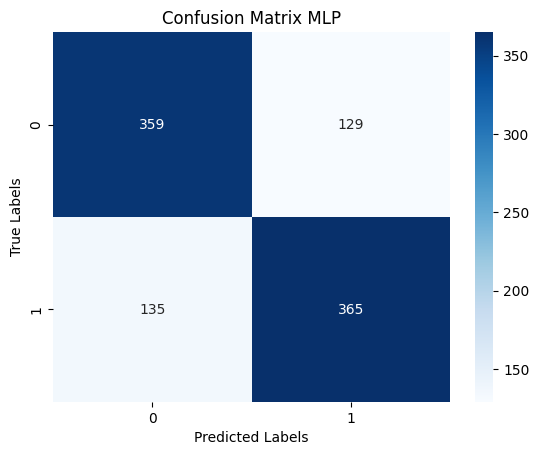

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Put the model in evaluation mode
factorization_model._model.eval()

# Collect all predictions and true labels
all_predictions = []
all_labels = []

with torch.no_grad():
    for features, labels in test_loader_mlp:
        # Move tensors to GPU
        features, labels = features.to(factorization_model._device), labels.to(factorization_model._device)

        # Get predictions
        outputs = factorization_model._model(features)
        predicted = (outputs > 0.5).float()  # Threshold at 0.5

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to NumPy arrays for use with scikit-learn
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Create confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix MLP')
plt.show()

Because my specific task here is to predict if the game is going to be won or not. The cost of false negative or false positive should be ralitivly similar, my model is behaving the same way, which is good.

### ROC Curve and AUC

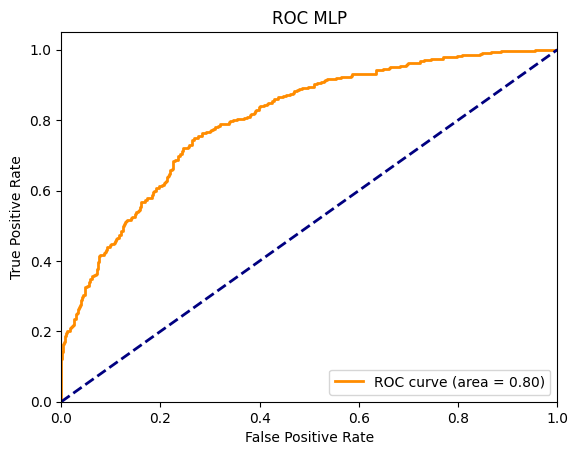

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Put the model in evaluation mode
factorization_model._model.eval()

# Collect all predictions and true labels
all_probs = []
all_labels = []

with torch.no_grad():
    for features, labels in test_loader_mlp:
        # Move tensors to GPU
        features, labels = features.to(factorization_model._device), labels.to(factorization_model._device)

        # Get probability predictions
        outputs = factorization_model._model(features)
        all_probs.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC MLP')
plt.legend(loc="lower right")
plt.show()

AUC is 0.8, which is not bad at all in my specific problem.